In [1]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn import linear_model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.api import VAR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import ParameterGrid
import numpy as np
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.kernel_ridge import KernelRidge
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman2
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import SGDRegressor
import statsmodels.api as sm
import itertools
import pmdarima as pm
from sklearn.pipeline import make_pipeline
from pmdarima.arima import auto_arima
from sklearn.kernel_ridge import KernelRidge		
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.ar_model import AutoReg
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from pmdarima.model_selection import train_test_split
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [2]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()



In [3]:
import yfinance as yf 


In [4]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(usd)))
usd

,USD/TL
2006-01-31,1.334344
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
...,...
2024-02-29,30.759448
2024-03-31,31.986743
2024-04-30,32.329467
2024-05-31,32.247882


In [35]:
params = {
    'series': "TP.FE.OKTG01",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf = formatted_response['items']
enf = pd.DataFrame(enf)


enf = enf.drop(columns=['UNIXTIME','Tarih'])
enf.columns = ['TÜFE']
enf['TÜFE'] = pd.to_numeric(enf['TÜFE'])
enf=enf.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf)))
enf

,TÜFE
2006-01-31,123.57
2006-02-28,123.84
2006-03-31,124.18
2006-04-30,125.84
2006-05-31,128.20
...,...
2024-01-31,1984.02
2024-02-29,2073.88
2024-03-31,2139.47
2024-04-30,2207.50


In [6]:
params = {
    'series': "TP.PR.ARZ13",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

money = formatted_response['items']
money = pd.DataFrame(money)


money = money.drop(columns=['UNIXTIME','Tarih'])
money.columns = ['Para Arzi']
money['Para Arzi'] = pd.to_numeric(money['Para Arzi'])
money=money.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(money)))
money=money.pct_change()*100
money=money.dropna()
money

,Para Arzi
2006-02-28,2.121748
2006-03-31,2.927613
2006-04-30,1.084694
2006-05-31,9.121170
2006-06-30,1.433197
...,...
2024-02-29,1.467195
2024-03-31,2.396667
2024-04-30,1.982216
2024-05-31,1.859475


In [7]:
params = {
    'series': "TP.PR.ARZ22",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','YEARWEEK'])
m3.columns = ['Tarih','M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3 = m3.set_index(pd.to_datetime(m3["Tarih"], format="%d-%m-%Y"))
del m3["Tarih"]
m3=m3.pct_change(4)*100
m3=m3.resample('M').last()
m3=m3.dropna()
m3

,M3
Tarih,
2006-02-28,2.204708
2006-03-31,2.711175
2006-04-30,1.323922
2006-05-31,9.308200
2006-06-30,-0.288618
...,...
2024-02-29,2.359600
2024-03-31,2.687835
2024-04-30,2.405048


In [8]:
params = {
    'series': "TP.TIG08",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'last',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

issizlik = formatted_response['items']
issizlik = pd.DataFrame(issizlik)


issizlik = issizlik.drop(columns=['UNIXTIME','Tarih'])
issizlik.columns = ['İşsizlik']
issizlik['İşsizlik'] = pd.to_numeric(issizlik['İşsizlik'])
issizlik=issizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(issizlik)))
issizlik=issizlik.dropna()
issizlik

,İşsizlik
2014-01-31,9.2
2014-02-28,9.5
2014-03-31,9.5
2014-04-30,9.7
2014-05-31,9.7
...,...
2023-12-31,8.8
2024-01-31,9.0
2024-02-29,8.7
2024-03-31,8.6


In [9]:
import yfinance as yf
df14=yf.download("BZ=F")["Close"]
df14=pd.DataFrame(df14)
df14.columns=["Brent"]
df14=df14.resample('M').mean()
df14

[*********************100%%**********************]  1 of 1 completed


,Brent
Date,
2007-07-31,76.395000
2007-08-31,71.258696
2007-09-30,77.135263
2007-10-31,82.456957
2007-11-30,92.060953
...,...
2024-02-29,81.623999
2024-03-31,84.665499
2024-04-30,88.999999


In [10]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 1,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','YEARWEEK'])
kredi.columns = ['Tarih','Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi = kredi.set_index(pd.to_datetime(kredi["Tarih"], format="%d-%m-%Y"))
del kredi["Tarih"]
kredi=kredi.pct_change(4)*100
kredi=kredi.resample('M').last()
kredi=kredi.dropna()
kredi

,Kredi
Tarih,
2006-02-28,1.559036
2006-03-31,5.768193
2006-04-30,3.124932
2006-05-31,8.993162
2006-06-30,3.965727
...,...
2024-02-29,3.130261
2024-03-31,4.108658
2024-04-30,1.832087


In [11]:
params = {
    'series': "TP.APIFON4",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

pfaiz = formatted_response['items']
pfaiz = pd.DataFrame(pfaiz)


pfaiz = pfaiz.drop(columns=['UNIXTIME','Tarih'])
pfaiz.columns = ['Faiz']
pfaiz['Faiz'] = pd.to_numeric(pfaiz['Faiz'])
pfaiz=pfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(pfaiz)))
pfaiz=pfaiz.dropna()
pfaiz

,Faiz
2011-01-31,6.438571
2011-02-28,6.250000
2011-03-31,6.250000
2011-04-30,6.267619
2011-05-31,6.250000
...,...
2024-02-29,45.239524
2024-03-31,47.287619
2024-04-30,51.357222
2024-05-31,50.544545


In [12]:
motorin=pd.read_excel("./tuketici fiyat endeksi secilmis maddelere ait ortalama fiyatlar (3).xls")
motorin=motorin.iloc[-1,:]
motorin=pd.DataFrame(motorin[3:])
motorin=motorin.set_index(pd.date_range(start="2005-01-31",periods=len(motorin),freq="M"))
motorin.columns=["Motorin"]
motorin

,Motorin
2005-01-31,1.75
2005-02-28,1.78
2005-03-31,1.87
2005-04-30,1.94
2005-05-31,1.88
...,...
2024-01-31,39.7935
2024-02-29,43.0968
2024-03-31,42.0568
2024-04-30,42.6763


In [13]:
params = {
    'series': "TP.TRY.MT02",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

mfaiz = formatted_response['items']
mfaiz = pd.DataFrame(mfaiz)


mfaiz = mfaiz.drop(columns=['UNIXTIME','Tarih'])
mfaiz.columns = ['Mevduat Faizi']
mfaiz['Mevduat Faizi'] = pd.to_numeric(mfaiz['Mevduat Faizi'])
mfaiz=mfaiz.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(mfaiz)))
mfaiz=mfaiz.dropna()
mfaiz

,Mevduat Faizi
2006-01-31,15.913333
2006-02-28,15.760000
2006-03-31,15.330000
2006-04-30,15.175000
2006-05-31,14.925000
...,...
2024-02-29,51.460000
2024-03-31,57.272000
2024-04-30,67.567500
2024-05-31,64.538000


In [14]:
params = {
    'series': "TP.BEK.S01.A.S",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

enf_belirsizlik = formatted_response['items']
enf_belirsizlik = pd.DataFrame(enf_belirsizlik)


enf_belirsizlik = enf_belirsizlik.drop(columns=['UNIXTIME','Tarih'])
enf_belirsizlik.columns = ['Enflasyon Belirsizliği']
enf_belirsizlik['Enflasyon Belirsizliği'] = pd.to_numeric(enf_belirsizlik['Enflasyon Belirsizliği'])
enf_belirsizlik=enf_belirsizlik.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(enf_belirsizlik)))
enf_belirsizlik=enf_belirsizlik.dropna()
enf_belirsizlik

,Enflasyon Belirsizliği
2013-01-31,0.32
2013-02-28,0.22
2013-03-31,0.16
2013-04-30,0.26
2013-05-31,0.29
...,...
2024-01-31,1.21
2024-02-29,0.94
2024-03-31,0.64
2024-04-30,0.55


In [15]:
params = {
    'series': "TP.FG.B01.95",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ito = formatted_response['items']
ito = pd.DataFrame(ito)


ito = ito.drop(columns=['UNIXTIME','Tarih'])
ito.columns = ['İTO']
ito['İTO'] = pd.to_numeric(ito['İTO'])
ito=ito.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ito)))
ito=ito.pct_change()*100
ito=ito.dropna()
ito

,İTO
2006-02-28,1.005528
2006-03-31,0.137253
2006-04-30,2.088936
2006-05-31,1.595826
2006-06-30,-0.100368
...,...
2024-01-31,6.717124
2024-02-29,4.070637
2024-03-31,3.926249
2024-04-30,4.894259


In [16]:
params = {
    'series': "TP.FE.OKTG04",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tufec = formatted_response['items']
tufec = pd.DataFrame(tufec)


tufec = tufec.drop(columns=['UNIXTIME','Tarih'])
tufec.columns = ['TÜFE C']
tufec['TÜFE C'] = pd.to_numeric(tufec['TÜFE C'])
tufec=tufec.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(tufec)))
tufec=tufec.pct_change()*100
tufec=tufec.shift(1)
tufec=tufec.dropna()
tufec

,TÜFE C
2006-03-31,-1.101304
2006-04-30,-0.368460
2006-05-31,1.857331
2006-06-30,2.622237
2006-07-31,1.344445
...,...
2024-01-31,2.305439
2024-02-29,7.576163
2024-03-31,3.571725
2024-04-30,3.524351


In [17]:
params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
2006-02-28,0.256616
2006-03-31,0.247960
2006-04-30,1.938881
2006-05-31,2.770820
2006-06-30,4.021325
...,...
2024-01-31,4.136164
2024-02-29,3.737000
2024-03-31,3.294983
2024-04-30,3.602753


In [32]:
params = {
    'series': "TP.IHRACATBEC.9999",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['ÜFE']
ihracat['ÜFE'] = pd.to_numeric(ihracat['ÜFE'])
ihracat=ihracat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ihracat)))
ihracat=ihracat.shift(1)
ihracat=ihracat.dropna()
ihracat=ihracat.pct_change()*100
ihracat

,ÜFE
2013-02-28,NaN
2013-03-31,7.272509
2013-04-30,6.926004
2013-05-31,-4.381315
2013-06-30,5.141469
...,...
2023-12-31,0.693838
2024-01-31,0.017009
2024-02-29,-13.018698
2024-03-31,5.575513


In [31]:
params = {
    'series': "TP.ITHALATBEC.9999",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['ÜFE']
ithalat['ÜFE'] = pd.to_numeric(ithalat['ÜFE'])
ithalat=ithalat.set_index(pd.date_range(start="2006-01-01",freq="M",periods=len(ithalat)))
ithalat=ithalat.shift(1)
ithalat=ithalat.dropna()
ithalat=ithalat.pct_change()*100
ithalat

,ÜFE
2013-02-28,NaN
2013-03-31,3.993020
2013-04-30,4.802567
2013-05-31,11.093906
2013-06-30,0.635134
...,...
2023-12-31,-1.607103
2024-01-31,0.411271
2024-02-29,-9.758116
2024-03-31,6.304695


In [46]:
data=pd.DataFrame()
data["USD/TL"]=usd["USD/TL"].rolling(3).mean()
data["Motorin"]=motorin["Motorin"]
data["TÜFE"]=enf["TÜFE"]
data["TÜFEt-1"]=data["TÜFE"].shift(1)
data=data.pct_change()*100
data["M3"]=m3["M3"].shift(1)
data["ÜFEt1"]=üfe["ÜFE"].shift(1)
data["ÜFEt2"]=üfe["ÜFE"].shift(2)
data["TÜFECt1"]=tufec["TÜFE C"].shift(1)
data["TÜFECt2"]=tufec["TÜFE C"].shift(2)
data["İTO"]=ito["İTO"]
data["İhracat"]=ihracat["ÜFE"]
data["İthalat"]=ithalat["ÜFE"]
data

,USD/TL,Motorin,TÜFE,TÜFEt-1,M3,ÜFEt1,ÜFEt2,TÜFECt1,TÜFECt2,İTO,İhracat,İthalat
2006-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-02-28,NaN,0.000000,0.218500,NaN,NaN,NaN,NaN,NaN,NaN,1.005528,NaN,NaN
2006-03-31,NaN,0.975610,0.274548,0.218500,2.204708,0.256616,NaN,NaN,NaN,0.137253,NaN,NaN
2006-04-30,0.075089,2.898551,1.336769,0.274548,2.711175,0.247960,0.256616,-1.101304,NaN,2.088936,NaN,NaN
2006-05-31,2.353679,4.694836,1.875397,1.336769,1.323922,1.938881,0.247960,-0.368460,-1.101304,1.595826,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,2.418218,8.301104,4.529188,6.703310,1.119951,4.136164,1.144328,2.305439,1.960293,4.070637,-13.018698,-9.758116
2024-03-31,3.239458,-2.413172,3.162671,4.529188,2.359600,3.737000,4.136164,7.576163,2.305439,3.926249,5.575513,6.304695
2024-04-30,2.452282,1.473008,3.179759,3.162671,2.687835,3.294983,3.737000,3.571725,7.576163,4.894259,7.050664,7.384867
2024-05-31,1.565526,-3.259186,3.368063,3.179759,2.405048,3.602753,3.294983,3.524351,3.571725,3.589407,NaN,NaN


In [47]:

data["Kredi"]=kredi["Kredi"].rolling(3).mean()
data["ParaArzi"]=money["Para Arzi"].shift(1)
data["İşsizlik"]=issizlik["İşsizlik"]
data["Enflasyon Belirsizliği"]=enf_belirsizlik
data["Mevduat Faizi"]=mfaiz["Mevduat Faizi"]
data["Politika Faizi"]=pfaiz["Faiz"]
data["Zam"]=0
data=data[['USD/TL', 'Motorin','M3', 'Enflasyon Belirsizliği','Zam','TÜFEt-1','ParaArzi','Kredi','İhracat','İthalat','Mevduat Faizi','İşsizlik','Politika Faizi','ÜFEt2','TÜFECt2','ÜFEt1','TÜFECt1','İTO','TÜFE']]
data.iloc[:12,4]=380.46
data.iloc[12:18,4]=403.03
data.iloc[18:24,4]=419.15
data.iloc[24:30,4]=481.55
data.iloc[30:36,4]=503.26
data.iloc[36:42,4]=527.13
data.iloc[42:48,4]=546.48
data.iloc[48:54,4]=576.57
data.iloc[54:60,4]=599.12
data.iloc[60:66,4]=629.96
data.iloc[66:72,4]=658.95
data.iloc[72:78,4]=701.13
data.iloc[78:84,4]=739.79
data.iloc[84:90,4]=773.01
data.iloc[90:96,4]=803.68
data.iloc[96:102,4]=846.00
data.iloc[102:108,4]=891.03
data.iloc[108:114,4]=949.07
data.iloc[114:120,4]=1000.54
data.iloc[120:132,4]=1300.99
data.iloc[132:144,4]=1404.06
data.iloc[144:156,4]=1603.12
data.iloc[156:168,4]=2020.9
data.iloc[168:180,4]=2324.71
data.iloc[180:192,4]=2825.90
data.iloc[192:198,4]=4253.4
data.iloc[198:204,4]=5500.35
data.iloc[204:210,4]=8506.8
data.iloc[210:216,4]=11402.33
data.iloc[216:,4]=17002
data["Zam"]=data["Zam"].pct_change()*100
data=data.fillna(0)

data["İşsizlik"].iloc[-2:]=8.4


data=data.loc["2014-01-31":]
data["TÜFE"].loc["2023-05-31"]+=2.88
data["İhracat"].iloc[-2:]=[-14.64,25.04]
data["İthalat"].iloc[-2:]=[-2.65,5.07]
data["ÜFEt1"].iloc[-1]=1.96
data["ÜFEt2"].iloc[-1]=3.60
data["TÜFECt1"].iloc[-1]=3.76
data["Motorin"].iloc[-1]=-2.62

data=data.dropna()
data

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,Zam,TÜFEt-1,ParaArzi,Kredi,İhracat,İthalat,Mevduat Faizi,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,İTO,TÜFE
2014-01-31,3.732429,2.881984,3.413428,0.37,5.265777,0.460607,3.375162,2.886648,-7.844611,7.652883,9.0220,9.2,7.503636,0.618013,1.776282,1.106494,0.625859,0.333618,1.978080
2014-02-28,3.033477,1.685899,1.958423,0.31,0.000000,1.978080,1.804994,2.214819,-6.175956,-14.641565,10.6275,9.5,10.070500,1.106494,0.625859,3.319203,-0.111246,1.009554,0.428192
2014-03-31,2.465778,-2.278097,0.229599,0.16,0.000000,0.428192,0.451349,1.160171,4.991889,-6.505852,11.3125,9.5,10.200952,3.319203,-0.111246,1.383675,0.308798,0.989257,1.125608
2014-04-30,-1.344724,-6.214384,0.730196,0.23,0.000000,1.125608,0.796760,0.126575,12.575902,13.043316,11.0200,9.7,10.046190,1.383675,0.308798,0.736212,0.701489,2.649799,1.344970
2014-05-31,-1.859714,-0.561578,-0.093468,0.26,0.000000,1.344970,-0.362357,0.464970,-7.919312,0.662228,10.4940,9.7,9.891000,0.736212,0.701489,0.085477,1.197755,0.211698,0.395224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-29,2.418218,8.301104,1.119951,0.94,0.000000,6.703310,0.992308,2.597683,-13.018698,-9.758116,51.4600,8.7,45.239524,1.144328,1.960293,4.136164,2.305439,4.070637,4.529188
2024-03-31,3.239458,-2.413172,2.359600,0.64,0.000000,4.529188,1.467195,3.009414,5.575513,6.304695,57.2720,8.6,47.287619,4.136164,2.305439,3.737000,7.576163,3.926249,3.162671
2024-04-30,2.452282,1.473008,2.687835,0.55,0.000000,3.162671,2.396667,3.023668,7.050664,7.384867,67.5675,8.5,51.357222,3.737000,7.576163,3.294983,3.571725,4.894259,3.179759
2024-05-31,1.565526,-3.259186,2.405048,0.47,0.000000,3.179759,1.982216,2.979092,-14.640000,-2.650000,64.5380,8.4,50.544545,3.294983,3.571725,3.602753,3.524351,3.589407,3.368063


## Cari Ay Enflasyon Tahmini

In [27]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data

,USD/TL,Motorin,Zam,ParaArzi,Kredi,Anket,İhracat,İşsizlik,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,TÜFE
0,0.430918,0.117352,0.251590,0.385889,0.650441,-0.347625,-0.686942,-1.246921,-0.384173,-0.527208,0.352115,-0.881444,0.044998
1,0.222117,-0.043983,-0.294454,-0.181363,0.191869,-0.623921,-0.557754,-1.047008,0.357529,-0.871948,-0.296860,-0.685323,-0.641459
2,0.052526,-0.578672,-0.294454,-0.670392,-0.528004,-0.653791,0.306863,-1.047008,-0.291262,-0.675495,-0.513952,-0.501974,-0.332568
3,-1.085803,-1.109623,-0.294454,-0.545606,-1.233509,-0.571649,0.894019,-0.913733,-0.508292,-0.491836,-0.732141,-0.270264,-0.235411
4,-1.239648,-0.347137,-0.294454,-0.964358,-1.002530,-0.668726,-0.692725,-0.913733,-0.726419,-0.259735,-0.935479,0.160125,-0.656061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0.086731,0.850813,4.798079,0.732061,0.408113,2.900719,-0.078293,-1.380196,-0.371491,0.096900,0.626039,0.246920,2.137840
121,0.038318,0.781717,-0.294454,-0.474961,0.453201,1.698458,-1.087521,-1.580108,0.631376,0.258323,0.492201,2.707852,1.174904
122,0.283651,-0.623431,-0.294454,-0.303399,0.734238,1.422162,0.352047,-1.646746,0.497576,2.723414,0.343994,0.838156,0.569663
123,0.048494,-0.131356,-0.294454,0.032390,0.743967,1.287748,0.467751,-1.780021,0.349411,0.850559,0.447189,0.816037,0.577232


In [28]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:-1,:]
y_train,y_test=y[:-7],y[-7:-1]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)


In [48]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2,l1
def weighted_mse(y_true, y_pred):
    n = len(y_true)
    weights = 1 / np.arange(1, n + 1)  # Ters orantılı ağırlıklar
    weights = weights[::-1]  # Ağırlıkları ters çevir (küçükten büyüğe)
    mse = np.sum(weights * (y_true - y_pred) ** 2) / n
    return mse
def objective(trial):
    # Define hyperparameters to be optimized
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 256)
    batch_size = trial.suggest_int('batch_size', 2, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','linear'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) 

    

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
    tahminler.columns=["TÜFE"]
    tahminler["Tahmin"]=scaler2.inverse_transform(y_pred)
    tahminler=tahminler.set_index(data.index[-7:-1])
    tahminler.loc["2024-01-31"]=6.70
    max=abs(tahminler["TÜFE"]-tahminler["Tahmin"]).max()
    mse=mean_squared_error(tahminler["TÜFE"],tahminler["Tahmin"])


    return mse # Return validation accuracy as the objective

In [ ]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

In [209]:
study.best_params

{'learning_rate': 0.009377039965970141,
 'units1': 43,
 'batch_size': 7,
 'activation1': 'tanh',
 'optimizer': 'adam',
 'rlrate': 0.2788740756825726}

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-7,:],X.iloc[-7:,:]
y_train,y_test=y[:-7],y[-7:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=43,activation="tanh",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.2788740756825726)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.009377039965970141)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=7,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler.columns=["TÜFE"]
tahminler["NN1"]=scaler2.inverse_transform(y_pred)
tahminler=tahminler.set_index(data.index[-7:])

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 4.9609 - mean_squared_error: 0.7581 - val_loss: 1.8685 - val_mean_squared_error: 0.1276
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5552 - mean_squared_error: 0.2316 - val_loss: 0.6110 - val_mean_squared_error: 0.1244
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6037 - mean_squared_error: 0.2142 - val_loss: 0.2450 - val_mean_squared_error: 0.0652
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3647 - mean_squared_error: 0.2045 - val_loss: 0.1522 - val_mean_squared_error: 0.0647
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2290 - mean_squared_error: 0.1452 - val_loss: 0.1672 - val_mean_squared_error: 0.0989
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [32]:
tahminler

,TÜFE,NN1
2023-11-30,3.281097,3.153005
2023-12-31,2.927207,2.336637
2024-01-31,6.703310,6.660959
2024-02-29,4.529188,4.349838
2024-03-31,3.162671,2.816653
2024-04-30,3.179759,3.371770
2024-05-31,0.000000,2.417900


In [33]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket','İhracat',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-13,:],X.iloc[-13:,:]
y_train,y_test=y[:-13],y[-13:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=32,activation="tanh",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.17424279013407418)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.014212504541816193)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=7,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler2=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler2.columns=["TÜFE"]
tahminler2["NN2"]=scaler2.inverse_transform(y_pred)
tahminler2=tahminler2.set_index(data.index[-13:])


Epoch 1/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.0921 - mean_squared_error: 0.6807 - val_loss: 1.1365 - val_mean_squared_error: 0.0857
Epoch 2/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0496 - mean_squared_error: 0.2153 - val_loss: 0.4792 - val_mean_squared_error: 0.0901
Epoch 3/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4884 - mean_squared_error: 0.1797 - val_loss: 0.2194 - val_mean_squared_error: 0.0617
Epoch 4/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3283 - mean_squared_error: 0.1909 - val_loss: 0.1672 - val_mean_squared_error: 0.0752
Epoch 5/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2347 - mean_squared_error: 0.1536 - val_loss: 0.1110 - val_mean_squared_error: 0.0527
Epoch 6/1000
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2292 - mean_squared_error: 0.1727 - val_loss: 0.1573 - val_mean_squared_error: 0.0951
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [34]:
tahminler2

,TÜFE,NN2
2023-05-31,2.923076,1.810046
2023-06-30,3.920498,3.983272
2023-07-31,9.488824,8.470710
2023-08-31,9.086793,7.124916
2023-09-30,4.753114,5.113838
2023-10-31,3.433981,3.289248
2023-11-30,3.281097,3.296402
2023-12-31,2.927207,2.232314
2024-01-31,6.703310,6.498575
2024-02-29,4.529188,3.998319


In [35]:
features=['USD/TL', 'Motorin', 'TÜFEt-1', 'ParaArzi', 'Kredi', 'Anket', 
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-25,:],X.iloc[-13:,:]
y_train,y_test=y[:-25],y[-13:]
X_val=X.iloc[-25:-13,:]
y_val=y[-25:-13]
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=29,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.42170876820347847)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0017583324241828712)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=25,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler3=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler3.columns=["TÜFE"]
tahminler3["NN3"]=scaler2.inverse_transform(y_pred)
tahminler3=tahminler3.set_index(data.index[-13:])


Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 7.2840 - mean_squared_error: 0.7709 - val_loss: 7.4105 - val_mean_squared_error: 1.1061
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.7908 - mean_squared_error: 0.5490 - val_loss: 7.0354 - val_mean_squared_error: 1.0105
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 6.3855 - mean_squared_error: 0.4240 - val_loss: 6.6814 - val_mean_squared_error: 0.9383
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.0220 - mean_squared_error: 0.3420 - val_loss: 6.3351 - val_mean_squared_error: 0.8711
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.6841 - mean_squared_error: 0.2820 - val_loss: 5.9959 - val_mean_squared_error: 0.8052
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.3668 - mean_squared_error: 0.2363 - val_loss: 5.6690 - val_mean_squared_error: 0.7437
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.0698 - mean_squared_error: 0.2027 - val_loss: 5.3593 - va

In [36]:
tahminler3

,TÜFE,NN3
2023-05-31,2.923076,1.919293
2023-06-30,3.920498,3.650019
2023-07-31,9.488824,7.310601
2023-08-31,9.086793,7.435143
2023-09-30,4.753114,5.190218
2023-10-31,3.433981,3.290220
2023-11-30,3.281097,3.366970
2023-12-31,2.927207,2.400017
2024-01-31,6.703310,4.893684
2024-02-29,4.529188,4.380088


In [37]:
features=['USD/TL', 'Motorin', 'Zam', 'ParaArzi', 'Kredi', 'Anket',
       'İşsizlik', 'ÜFEt2', 'TÜFECt2', 'ÜFEt1', 'TÜFECt1','TÜFE']
data1=data[features]
scaler1 = StandardScaler()
scaled_data = scaler1.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler2 = StandardScaler()
scaled_data["TÜFE"]=scaler2.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["TÜFE"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-13,:],X.iloc[-13:,:]
y_train,y_test=y[:-13],y[-13:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=26,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.1640998114336349)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.021385011088592594)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=5000, batch_size=33,callbacks=[early_stopping],verbose=1,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
tahminler4=pd.DataFrame(scaler2.inverse_transform(y_test))
tahminler4.columns=["TÜFE"]
tahminler4["NN4"]=scaler2.inverse_transform(y_pred)
tahminler4=tahminler4.set_index(data.index[-13:])

Epoch 1/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 3.2609 - mean_squared_error: 0.9259 - val_loss: 3.2983 - val_mean_squared_error: 1.2995
Epoch 2/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 3.4866 - mean_squared_error: 1.7085 - val_loss: 1.6688 - val_mean_squared_error: 0.1493
Epoch 3/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.8044 - mean_squared_error: 0.3395 - val_loss: 1.5759 - val_mean_squared_error: 0.3906
Epoch 4/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.6037 - mean_squared_error: 0.5244 - val_loss: 0.9946 - val_mean_squared_error: 0.0470
Epoch 5/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0582 - mean_squared_error: 0.1400 - val_loss: 0.9611 - val_mean_squared_error: 0.1880
Epoch 6/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9523 - mean_squared_error: 0.2362 - val_loss: 0.7405 - val_mean_squared_error: 0.1279
Epoch 7/5000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7286 - mean_squared_error: 0.1606 - val_loss: 0.5259 - va

In [38]:
tahminler4

,TÜFE,NN4
2023-05-31,2.923076,1.612168
2023-06-30,3.920498,3.839368
2023-07-31,9.488824,8.568648
2023-08-31,9.086793,7.157032
2023-09-30,4.753114,4.743791
2023-10-31,3.433981,3.110611
2023-11-30,3.281097,3.146819
2023-12-31,2.927207,2.207254
2024-01-31,6.703310,6.634337
2024-02-29,4.529188,4.114448


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


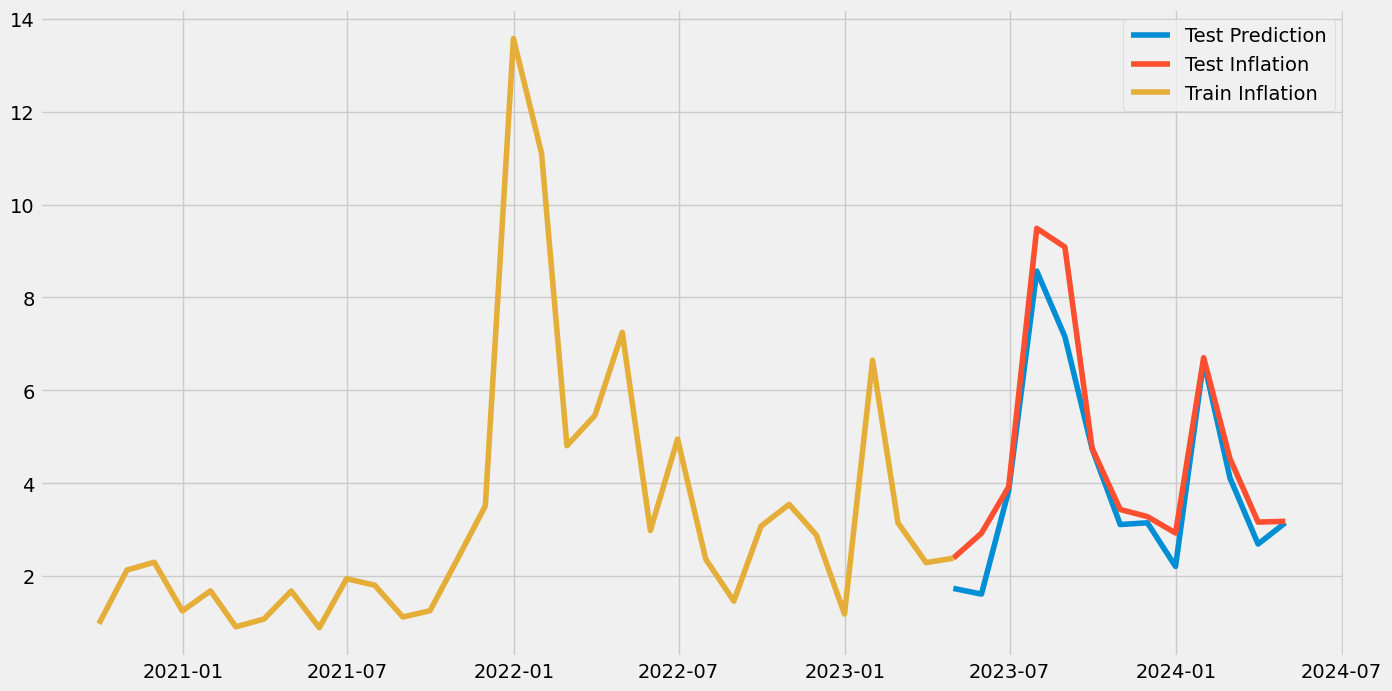

In [39]:
plt.figure(figsize=(15,8))
plt.plot(pd.DataFrame(scaler2.inverse_transform(np.array(model.predict(scaled_data.iloc[-14:-1,:-1])).reshape(-1,1))).set_index(data1.index[-14:-1]),label="Test Prediction")
plt.plot(data["TÜFE"].iloc[-14:-1],label="Test Inflation")
plt.plot(data["TÜFE"].iloc[-45:-13],label="Train Inflation")

plt.legend()

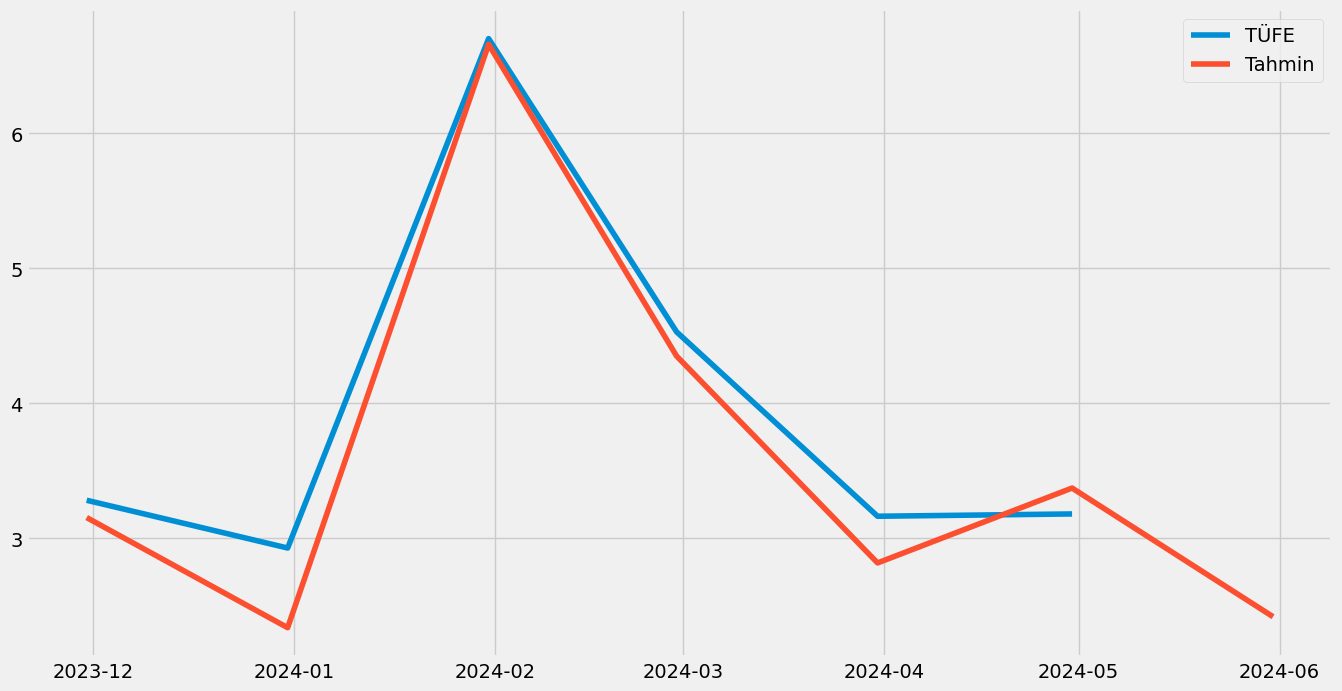

In [40]:
plt.figure(figsize=(15,8))
plt.plot(tahminler["TÜFE"].iloc[:-1],label="TÜFE")
plt.plot(tahminler["NN1"],label="Tahmin")
plt.legend()

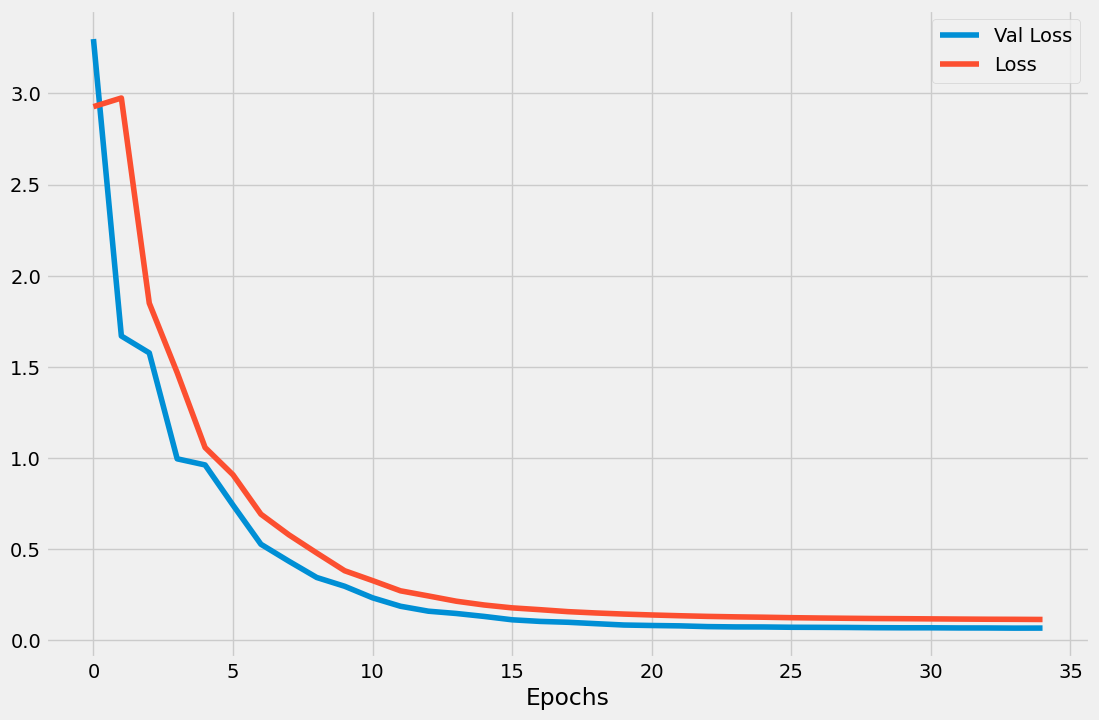

In [41]:
plt.figure(figsize=(12,8))
plt.plot(history.history["val_loss"],label="Val Loss")
plt.plot(history.history["loss"],label="Loss")
plt.xlabel("Epochs")
plt.legend()

In [43]:
kısatahminler=pd.concat([tahminler.iloc[-7:],tahminler2.iloc[-7:,1],tahminler3.iloc[-7:,1],tahminler4.iloc[-7:,1]],axis=1)
kısatahminler["Ortalama"]=kısatahminler.iloc[:,1:].mean(axis=1)
kısatahminler.iloc[-1,1:]+=0.66
kısatahminler

,TÜFE,NN1,NN2,NN3,NN4,Ortalama
2023-11-30,3.281097,3.153005,3.296402,3.366970,3.146819,3.240799
2023-12-31,2.927207,2.336637,2.232314,2.400017,2.207254,2.294055
2024-01-31,6.703310,6.660959,6.498575,4.893684,6.634337,6.171889
2024-02-29,4.529188,4.349838,3.998319,4.380088,4.114448,4.210673
2024-03-31,3.162671,2.816653,2.904265,2.907402,2.690414,2.829684
2024-04-30,3.179759,3.371770,3.231004,3.348546,3.148556,3.274969
2024-05-31,0.000000,3.077900,3.067568,3.330346,3.074191,3.137501


## Orta Vadeli Tahminler

In [49]:
model=auto_arima(pfaiz["Faiz"],seasonal=False,information_criterion="bic")
model_fit = model.fit(pfaiz["Faiz"])
faiztahmin = model_fit.predict(25)
faiztahmin=pd.DataFrame(faiztahmin)
faiztahmin.columns=["Faiz"]
row=pd.DataFrame({"Faiz":pfaiz.iloc[-4:,0]},index=pd.date_range(start="2024-03-30",periods=4,freq="1M"))
faiztahmin=pd.concat([row,faiztahmin],axis=0)

faiztahmin.iloc[4:,0]=[50,50,50,50,50,50,50,50,50,50,50,45,40,35,35,35,35,30,30,30,30,30,25,25,25]
faiztahmin

,Faiz
2024-03-31,47.287619
2024-04-30,51.357222
2024-05-31,50.544545
2024-06-30,50.048889
2024-07-31,50.000000
2024-08-31,50.000000
2024-09-30,50.000000
2024-10-31,50.000000
2024-11-30,50.000000
2024-12-31,50.000000


In [50]:
trainexog=pd.DataFrame()
trainexog["Dolar"]=usd.iloc[-16:-6,0].rolling(2).mean().dropna()*df14.iloc[:-6,0]
trainexog=trainexog.dropna()
trainexog=np.array(trainexog).reshape(-1,1)
testexog=pd.DataFrame()
testexog["Dolar"]=usd.iloc[-7:,0].rolling(2).mean().dropna()*df14.iloc[-6:,0]
testexog=testexog.dropna()
testexog=np.array(testexog).reshape(-1,1)

In [51]:
exog=pd.DataFrame()
exog["X"]=usd["USD/TL"].rolling(2).mean().dropna()*df14["Brent"]
exog=exog.dropna()
exog
#exog=np.array(exog).reshape(-1,1)


,X
2007-07-31,99.454046
2007-08-31,92.519699
2007-09-30,99.580871
2007-10-31,101.824103
2007-11-30,110.143119
...,...
2024-02-29,2481.908203
2024-03-31,2656.218779
2024-04-30,2862.071302
2024-05-31,2679.695793


In [52]:

zamtahmin=pd.DataFrame()
zamtahmin["Zam"]=[0,0,0,0,0,49.11,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,25]
zamtahmin.columns=["Zam"]
zamtahmin=zamtahmin.set_index(pd.date_range(start="2023-08-30",end="2026-02-27",freq="1M"))
zamtahmin

,Zam
2023-08-31,0.00
2023-09-30,0.00
2023-10-31,0.00
2023-11-30,0.00
2023-12-31,0.00
2024-01-31,49.11
2024-02-29,0.00
2024-03-31,0.00
2024-04-30,0.00
2024-05-31,0.00


In [53]:
faiztahmin.columns=["Faiz"]


In [54]:
exogtrain=pd.DataFrame()
exogtrain["Faiz"]=pfaiz["Faiz"].iloc[95:-13]
exogtrain=np.array(exogtrain).reshape(-1,1)

exogtest=pd.DataFrame()
exogtest=pd.concat([pfaiz["Faiz"].iloc[-14:-3],faiztahmin.iloc[2:,0]],axis=0)
exogtest=np.array(exogtest).reshape(-1,1)



In [61]:
exog=pfaiz["Faiz"].iloc[36:-2]
exog=np.array(exog).reshape(-1,1)

In [62]:
exogtest=faiztahmin.iloc[2:]
exogtest=np.array(exogtest).reshape(-1,1)

In [63]:
model=auto_arima(issizlik,seasonal=True,m=3,X=exog)
model_fit = model.fit(issizlik,X=exog)
issizliktahmin = model_fit.predict(27,X=exogtest)
issizliktahmin=pd.DataFrame(issizliktahmin)
issizliktahmin.columns=["İşsizlik"]
issizliktahmin

,İşsizlik
2024-05-31,8.452397
2024-06-30,8.443701
2024-07-31,8.435135
2024-08-31,8.421754
2024-09-30,8.418178
2024-10-31,8.416087
2024-11-30,8.413071
2024-12-31,8.412265
2025-01-31,8.411794
2025-02-28,8.411114


In [64]:
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [65]:
import optuna


In [746]:
import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.01, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.50,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"])

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=usd.index
    sn["y"]=usd.values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"])
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(usd.values,predictions["yhat"][:-12])
    return mae_score
try:
    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=1000)
    print("Optimize işlemi başarıyla tamamlandı.")
except Exception as e:
    print(f'Hata oluştu: {e}')
    print('Optimize işlemi başarısız oldu. Devam ediyor...')


[I 2024-06-13 23:36:23,845] A new study created in memory with name: no-name-3e82c1ef-c8df-4820-ba89-5c925630786e
23:36:23 - cmdstanpy - INFO - Chain [1] start processing
23:36:24 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-06-13 23:36:24,708] Trial 0 finished with value: 0.30302265504912573 and parameters: {'changepoint_prior_scale': 8.890763526764655, 'changepoint_range': 0.8612397529539971, 'growth': 'linear', 'seasonality_prior_scale': 1.8967350385757502, 'n_changepoints': 84, 'yearly_seasonality': True, 'weekly_seasonality': True}. Best is trial 0 with value: 0.30302265504912573.
23:36:24 - cmdstanpy - INFO - Chain [1] start processing
23:36:25 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-06-13 23:36:25,170] Trial 1 finished with value: 0.20726457525776534 and parameters: {'changepoint_prior_scale': 2.1027273950404757, 'changepoint_range': 0.9145175317588494, 'growth': 'linear', 'seasonality_prior_scale': 7.965970873027534, 'n_changepoints': 30, 'yearly_season

KeyboardInterrupt: 

In [747]:
study.best_params

{'changepoint_prior_scale': 3.118052740230282,
 'changepoint_range': 0.9852605086651477,
 'growth': 'linear',
 'seasonality_prior_scale': 5.9214032792438305,
 'n_changepoints': 100,
 'yearly_seasonality': False,
 'weekly_seasonality': 'auto'}

In [748]:
sn=pd.DataFrame()
sn["ds"]=usd.index
sn["y"]=usd.values
prophet=Prophet(growth="linear",changepoint_prior_scale=3.118052740230282,changepoint_range=0.9852605086651477,seasonality_prior_scale=5.9214032792438305,n_changepoints=100,interval_width=0.70,yearly_seasonality=False,weekly_seasonality="auto")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=26,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

23:39:48 - cmdstanpy - INFO - Chain [1] start processing
23:39:49 - cmdstanpy - INFO - Chain [1] done processing


In [750]:
usdtahmin=(predictions["yhat"][-27:].pct_change(periods=1)*100).dropna()
usdtahmin

ds
2024-07-31    1.283148
2024-08-31    1.266892
2024-09-30    1.210686
2024-10-31    1.236077
2024-11-30    1.181598
2024-12-31    1.206726
2025-01-31    1.192338
2025-02-28    1.064261
2025-03-31    1.165881
2025-04-30    1.115269
2025-05-31    1.139734
2025-06-30    1.090539
2025-07-31    1.114733
2025-08-31    1.102444
2025-09-30    1.055248
2025-10-31    1.079036
2025-11-30    1.033081
2025-12-31    1.056602
2026-01-31    1.045554
2026-02-28    0.934600
2026-03-31    1.025155
2026-04-30    0.982018
2026-05-31    1.004884
2026-06-30    0.962793
2026-07-31    0.985399
2026-08-31    0.975784
Name: yhat, dtype: float64

In [751]:
usdtahmin1 = []
result = usd.iloc[-1,0]
for i in range(len(usdtahmin)):
    result *= (1 + usdtahmin[i] / 100)
    usdtahmin1.append(result)

usdtahmin1 = np.array(usdtahmin1).reshape(-1, 1)
usdtahmin1 = pd.DataFrame(usdtahmin1)
usdtahmin1.columns = ["USD/TL"]
usdtahmin1=pd.concat([usd["USD/TL"].loc["2024-03-31":],usdtahmin1],axis=0)
usdtahmin1 = usdtahmin1.set_index(pd.date_range(start="2024-03-31", periods=len(usdtahmin1), freq="1M"))
usdtahmin1

,USD/TL
2024-03-31,31.986743
2024-04-30,32.329467
2024-05-31,32.247882
2024-06-30,32.318290
2024-07-31,32.732981
2024-08-31,33.147673
2024-09-30,33.548987
2024-10-31,33.963678
2024-11-30,34.364993
2024-12-31,34.779684


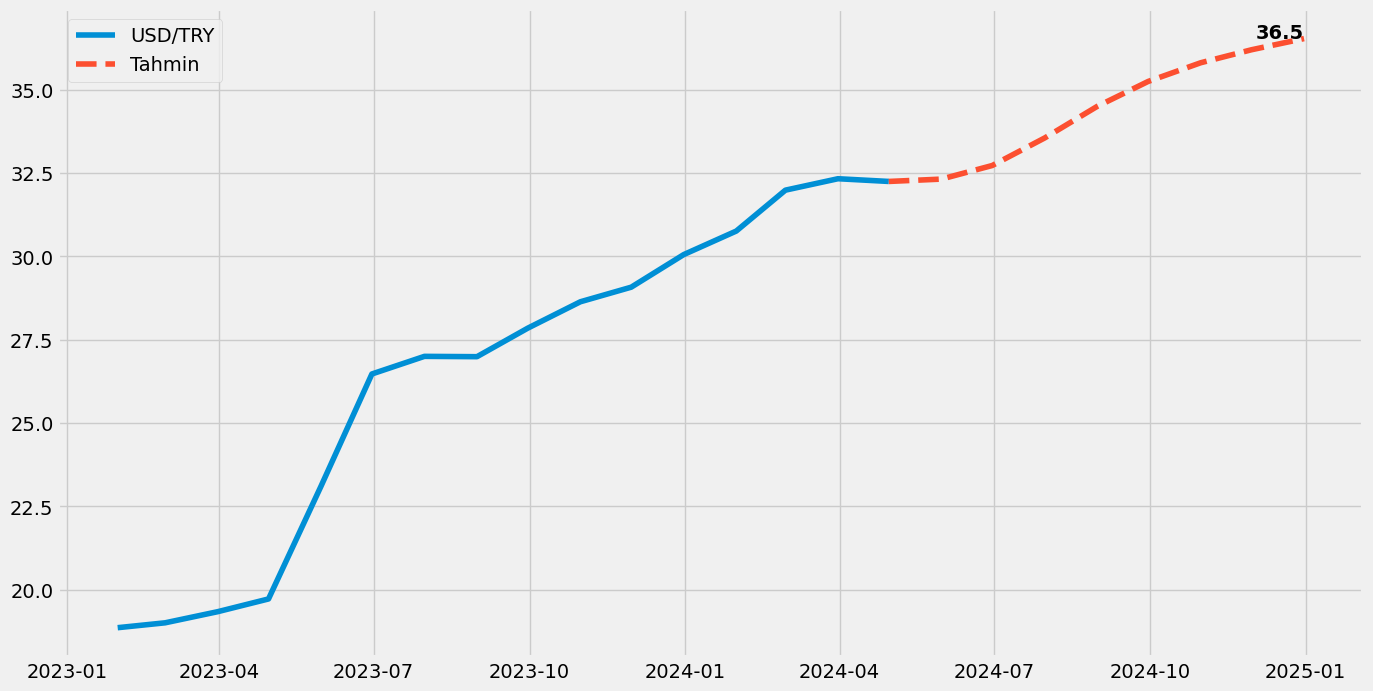

In [69]:
plt.figure(figsize=(15,8))
plt.plot(usdtahmin1.loc["2023-01-31":"2024-05-30"],label="USD/TRY")
plt.plot(usdtahmin1.loc["2024-04-30":"2024-12-31"],"--",label="Tahmin")
plt.text(pd.Timestamp("2024-12-31"), usdtahmin1.loc["2024-12-31"], '36.5', horizontalalignment='right',fontweight="bold")
plt.legend()

In [ ]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'growth':trial.suggest_categorical('growth',['linear'])
                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df14[50:].index
    sn["y"]=df14[50:].values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df14[50:].index\n    sn["y"]=df14[50:].values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = optuna.create_study(direction=

In [ ]:
"""study.best_params"""

'study.best_params'

In [70]:
sn=pd.DataFrame()
sn["ds"]=df14.index
sn["y"]=df14.values
prophet=Prophet(growth="linear",changepoint_prior_scale=9.333547662504625,changepoint_range=0.9362159367416,seasonality_prior_scale=2.378940289163559,n_changepoints=98)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

21:57:18 - cmdstanpy - INFO - Chain [1] start processing
21:57:19 - cmdstanpy - INFO - Chain [1] done processing


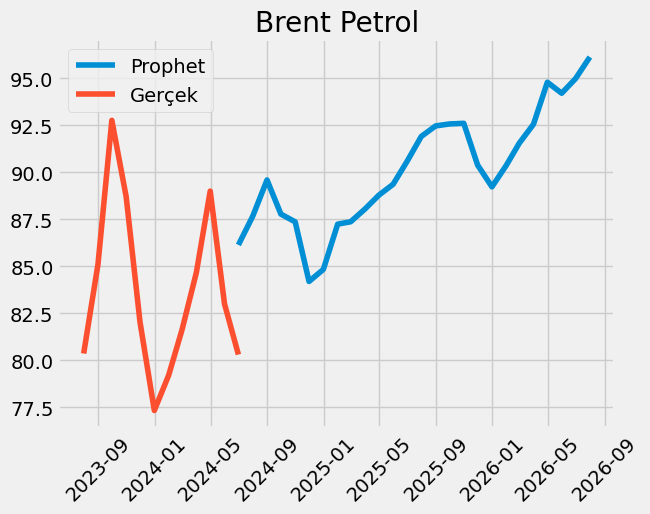

In [71]:
plt.title("Brent Petrol")
plt.plot(predictions["yhat"][-26:],label="Prophet")
plt.plot(df14["Brent"][-12:],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [72]:
brenttahmin=predictions["yhat"][-29:]
brenttahmin

ds
2024-03-31    83.566424
2024-04-30    82.773198
2024-05-31    84.492346
2024-06-30    86.135010
2024-07-31    87.658367
2024-08-31    89.591936
2024-09-30    87.775595
2024-10-31    87.361810
2024-11-30    84.191571
2024-12-31    84.833169
2025-01-31    87.241681
2025-02-28    87.366519
2025-03-31    88.044859
2025-04-30    88.779466
2025-05-31    89.362789
2025-06-30    90.571795
2025-07-31    91.908521
2025-08-31    92.467686
2025-09-30    92.572490
2025-10-31    92.605434
2025-11-30    90.385481
2025-12-31    89.226833
2026-01-31    90.367263
2026-02-28    91.543082
2026-03-31    92.560345
2026-04-30    94.792177
2026-05-31    94.207314
2026-06-30    94.983674
2026-07-31    96.133870
Name: yhat, dtype: float64

In [ ]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.001,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'growth':trial.suggest_categorical('growth',['linear'])

            

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=enf_belirsizlik.index
    sn["y"]=enf_belirsizlik.values
    prophet=Prophet(**params)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.001,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'growth\':trial.suggest_categorical(\'growth\',[\'linear\'])\n\n            \n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=enf_belirsizlik.index\n    sn["y"]=enf_belirsizlik.values\n    prophet=Prophet(**params)\n    prophet.fit(sn)\n    future_dates=prophet.make_future_dataframe(periods=13,freq="M")\n    predictions=prophet.predict(future_dates)\n    predictions=predictions.set_index(predictions["ds"])\n    \n    mae_score = mean_squared_error(sn["y"],predictions["yhat"][:-13])\n    return mae_score\nstudy = o

21:57:32 - cmdstanpy - INFO - Chain [1] start processing
21:57:32 - cmdstanpy - INFO - Chain [1] done processing


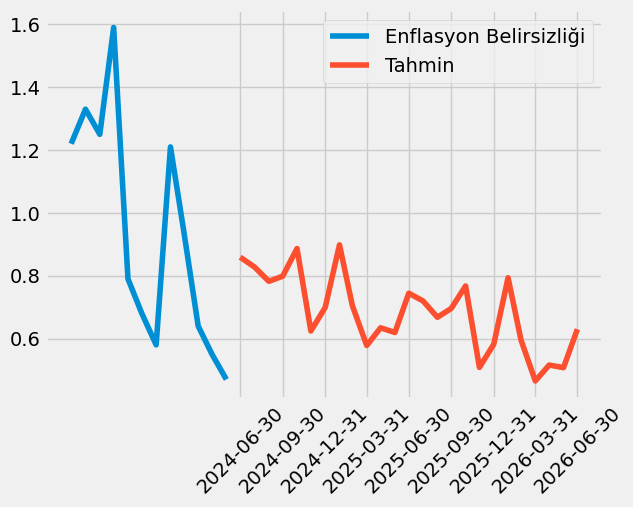

In [73]:
sn=pd.DataFrame()
sn["ds"]=enf_belirsizlik.index
sn["y"]=enf_belirsizlik.values
prophet=Prophet(changepoint_prior_scale=1.7,changepoint_range=0.91,seasonality_prior_scale=0.1053403857042852,n_changepoints=44,growth="linear")
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])
plt.plot(enf_belirsizlik[-12:],label="Enflasyon Belirsizliği")
plt.plot(predictions["yhat"][-25:],label="Tahmin")
plt.xticks(predictions.index[-25::3],rotation=45)
plt.legend()

In [74]:
enfbelirsizliktahmin1=pd.DataFrame(predictions["yhat"][-26:])
enfbelirsizliktahmin1.columns=["Enflasyon Belirsizliği"]
enfbelirsizliktahmin1.index.names=[""]
enfbelirsizliktahmin1.iloc[0,0]=enf_belirsizlik.iloc[-1,0]
enfbelirsizliktahmin1

,Enflasyon Belirsizliği
,
2024-05-31,0.470000
2024-06-30,0.859019
2024-07-31,0.827703
2024-08-31,0.782257
2024-09-30,0.798574
2024-10-31,0.886604
2024-11-30,0.624219
2024-12-31,0.698910
2025-01-31,0.898333


In [ ]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',[0.01,10]),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].index
    sn["y"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][-12:],predictions["yhat"].tail(12))
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',[0.01,10]),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=perakende1["Mevsimsellikten ve Takvimden Arındırılmış"][p

In [ ]:
#study.best_params

In [75]:
((usdtahmin1[2:-2].pct_change(periods=1)*100).dropna())

,USD/TL
2023-03-31,1.755222
2023-04-30,1.977980
2023-05-31,17.173485
2023-06-30,14.560243
2023-07-31,1.997667
2023-08-31,-0.035852
2023-09-30,3.174078
2023-10-31,2.840498
2023-11-30,1.528701
2023-12-31,3.366802


In [76]:
brenttahmin1=(brenttahmin.pct_change()*100).dropna()
brenttahmin1

ds
2024-04-30   -0.949217
2024-05-31    2.076938
2024-06-30    1.944157
2024-07-31    1.768569
2024-08-31    2.205800
2024-09-30   -2.027348
2024-10-31   -0.471412
2024-11-30   -3.628861
2024-12-31    0.762069
2025-01-31    2.839116
2025-02-28    0.143094
2025-03-31    0.776430
2025-04-30    0.834356
2025-05-31    0.657047
2025-06-30    1.352919
2025-07-31    1.475875
2025-08-31    0.608393
2025-09-30    0.113341
2025-10-31    0.035587
2025-11-30   -2.397216
2025-12-31   -1.281896
2026-01-31    1.278124
2026-02-28    1.301156
2026-03-31    1.111240
2026-04-30    2.411218
2026-05-31   -0.616995
2026-06-30    0.824097
2026-07-31    1.210942
Name: yhat, dtype: float64

In [120]:
motorintahmin=pd.DataFrame((1+(((usdtahmin1[1:-1].pct_change(periods=1)*100).dropna())/100)).values*(1+(((brenttahmin1[:-1]).dropna())/100)).values.reshape(-1,1))
motorintahmin.columns=["Motorin"]
motorintahmin=motorintahmin.set_index(pd.date_range(start="2024-04-28",periods=len(motorintahmin),freq="1M"))
motorintahmin.iloc[0,0]=(motorin.pct_change(periods=1)*100).iloc[-1,0]
motorintahmin[1:]=((motorintahmin[1:])-1)*100
motorintahmin

,Motorin
2024-04-30,-3.259186
2024-05-31,2.299807
2024-06-30,3.229828
2024-07-31,4.343324
2024-08-31,5.092229
2024-09-30,0.093458
2024-10-31,1.112349
2024-11-30,-2.578327
2024-12-31,1.694763
2025-01-31,4.959747


In [ ]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,100),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=money["Para Arzi"].index
    sn["y"]=money["Para Arzi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(money["Para Arzi"],predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,100),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=money["Para Arzi"].index\n    sn["y"]=money["Para Arzi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_rang

In [ ]:
"""study.best_params"""

'study.best_params'

In [544]:
sn=pd.DataFrame()
sn["ds"]=money["Para Arzi"].index
sn["y"]=money["Para Arzi"].values
prophet=Prophet(changepoint_prior_scale=0.9034897796889,changepoint_range=0.9229543315216538,growth='linear',seasonality_prior_scale=2.03031163229546,n_changepoints=15)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

23:20:08 - cmdstanpy - INFO - Chain [1] start processing
23:20:08 - cmdstanpy - INFO - Chain [1] done processing


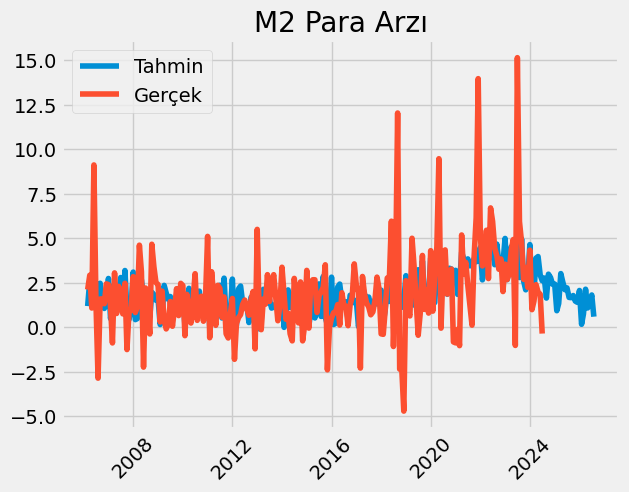

In [545]:
plt.title("M2 Para Arzı")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(money["Para Arzi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [546]:
paraarzitahmin=(predictions["yhat"]).tail(25)
paraarzitahmin

ds
2024-07-31    2.767192
2024-08-31    1.643518
2024-09-30    2.985345
2024-10-31    2.794857
2024-11-30    2.418179
2024-12-31    2.432057
2025-01-31    0.932940
2025-02-28    1.340836
2025-03-31    3.018950
2025-04-30    2.531552
2025-05-31    2.111759
2025-06-30    2.216476
2025-07-31    1.680217
2025-08-31    1.666918
2025-09-30    1.785844
2025-10-31    1.472918
2025-11-30    1.404105
2025-12-31    2.070780
2026-01-31    0.169613
2026-02-28    0.757779
2026-03-31    2.139889
2026-04-30    1.088026
2026-05-31    1.289808
2026-06-30    1.817392
2026-07-31    0.597766
Name: yhat, dtype: float64

In [547]:
paraarzitahmin1 = paraarzitahmin
paraarzitahmin1 = np.array(paraarzitahmin1).reshape(-1, 1)
paraarzitahmin1 = pd.DataFrame(paraarzitahmin1)
paraarzitahmin1.columns = ["Para Arzi"]
paraarzitahmin1 = paraarzitahmin1.set_index(pd.date_range(start="2024-07-30", periods=len(paraarzitahmin), freq="1M"))
row=pd.DataFrame({"Para Arzi":money.iloc[-4:,0]},index=pd.date_range(start="2024-03-31",periods=4,freq="M"))
paraarzitahmin1=pd.concat([row,paraarzitahmin1])
paraarzitahmin1

,Para Arzi
2024-03-31,2.396667
2024-04-30,1.982216
2024-05-31,1.859475
2024-06-30,-0.350983
2024-07-31,2.767192
2024-08-31,1.643518
2024-09-30,2.985345
2024-10-31,2.794857
2024-11-30,2.418179
2024-12-31,2.432057


In [ ]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'm':trial.suggest_int('m',0,110),
                'cap':trial.suggest_float('cap',0,200)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=borc["Borç"][params["m"]:-12].index
    sn["y"]=borc["Borç"][params["m"]:-12].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(borc["Borç"][-12:],predictions["yhat"][-12:])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'m\':trial.suggest_int(\'m\',0,110),\n                \'cap\':trial.suggest_float(\'cap\',0,200)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=borc["Borç"][params["m"]:-12].index\n    sn["y"]=borc["Borç

In [ ]:
#study.best_params

In [ ]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 5),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,5),
                'n_changepoints':trial.suggest_int('n_changepoints',1,200),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),


                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=df3["Kredi"].index
    sn["y"]=df3["Kredi"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=13,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(df3.values,predictions["yhat"][:-13])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 5),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,5),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,200),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=df3["Kredi"].index\n    sn["y"]=df3["Kredi"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=

In [ ]:
"""study.best_params"""

'study.best_params'

In [548]:
sn=pd.DataFrame()
sn["ds"]=kredi["Kredi"].index
sn["y"]=kredi["Kredi"].values
prophet=Prophet(changepoint_prior_scale=30.99759561372614,changepoint_range=0.872589785485153,growth="linear",seasonality_prior_scale=3.534157847860739,n_changepoints=189,yearly_seasonality=True,weekly_seasonality=True)

prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=25,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

23:20:24 - cmdstanpy - INFO - Chain [1] start processing
23:20:25 - cmdstanpy - INFO - Chain [1] done processing


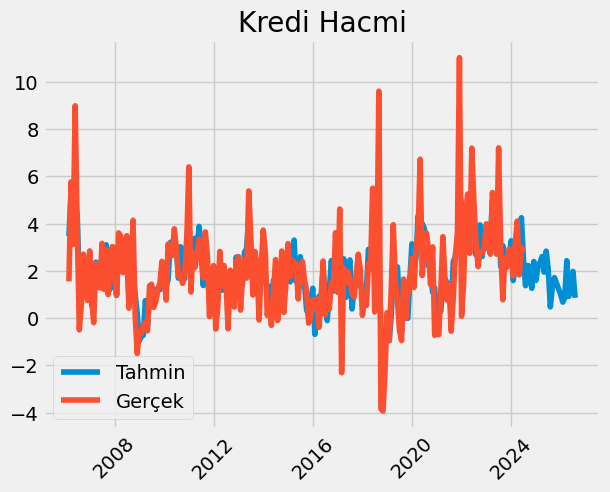

In [549]:
plt.title("Kredi Hacmi")
plt.plot(predictions["yhat"],label="Tahmin")
plt.plot(kredi["Kredi"],label="Gerçek")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [550]:
kreditahmin=(predictions["yhat"]).tail(25)
kreditahmin

ds
2024-07-31    1.376094
2024-08-31    2.230637
2024-09-30    2.191700
2024-10-31    1.264566
2024-11-30    2.400166
2024-12-31    1.597542
2025-01-31    2.230618
2025-02-28    2.341677
2025-03-31    2.607243
2025-04-30    1.949288
2025-05-31    2.839510
2025-06-30    2.071631
2025-07-31    0.478270
2025-08-31    1.334561
2025-09-30    1.718643
2025-10-31    1.465657
2025-11-30    1.234177
2025-12-31    0.995688
2026-01-31    0.680182
2026-02-28    0.864433
2026-03-31    2.434982
2026-04-30    0.926331
2026-05-31    1.733203
2026-06-30    1.982223
2026-07-31    0.861772
Name: yhat, dtype: float64

In [551]:
kreditahmin1 = kreditahmin

kreditahmin1 = np.array(kreditahmin1).reshape(-1, 1)
kreditahmin1 = pd.DataFrame(kreditahmin1)
kreditahmin1.columns = ["Kredi"]
kreditahmin1 = kreditahmin1.set_index(pd.date_range(start="2024-07-30", periods=len(kreditahmin1), freq="1M"))
row=pd.DataFrame({"Kredi":kredi.iloc[-4:,0]},index=pd.date_range(start="2024-03-30",periods=4,freq="1M"))
kreditahmin1=pd.concat([row,kreditahmin1],axis=0)
kreditahmin1

,Kredi
2024-03-31,4.108658
2024-04-30,1.832087
2024-05-31,2.996531
2024-06-30,2.792769
2024-07-31,1.376094
2024-08-31,2.230637
2024-09-30,2.191700
2024-10-31,1.264566
2024-11-30,2.400166
2024-12-31,1.597542


In [ ]:
"""import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.005, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,150),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=m3["M3"].index
    sn["y"]=m3["M3"].values
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=12,freq="M")
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(m3["M3"],predictions["yhat"][:-12])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.005, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,150),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=m3["M3"].index\n    sn["y"]=m3["M3"].values\n    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["

In [604]:
sn=pd.DataFrame()
sn["ds"]=m3["M3"].index
sn["y"]=m3["M3"].values
prophet=Prophet(changepoint_prior_scale=2.5,changepoint_range=0.9,growth='linear',seasonality_prior_scale=4.7636997959024185,n_changepoints=10)
prophet.fit(sn)
future_dates=prophet.make_future_dataframe(periods=13,freq="M")
predictions=prophet.predict(future_dates)
predictions=predictions.set_index(predictions["ds"])

23:23:08 - cmdstanpy - INFO - Chain [1] start processing
23:23:08 - cmdstanpy - INFO - Chain [1] done processing


In [605]:
np.cumprod(1+(predictions["yhat"].tail(13))/100)

ds
2024-07-31    1.030082
2024-08-31    1.050424
2024-09-30    1.083915
2024-10-31    1.120531
2024-11-30    1.153802
2024-12-31    1.179181
2025-01-31    1.193384
2025-02-28    1.214107
2025-03-31    1.252492
2025-04-30    1.286550
2025-05-31    1.320031
2025-06-30    1.355048
2025-07-31    1.383108
Name: yhat, dtype: float64

In [606]:
m3tahmin=(predictions["yhat"].tail(13))


m3tahmin1 = np.array(m3tahmin).reshape(-1, 1)
m3tahmin1 = pd.DataFrame(m3tahmin1)
m3tahmin1.columns = ["M3"]
m3tahmin1 = m3tahmin1.set_index(pd.date_range(start="2024-07-31", periods=len(m3tahmin1), freq="1M"))
row=pd.DataFrame({"M3":m3.iloc[-4:,0]},index=pd.date_range(start="2024-03-30",periods=4,freq="1M"))
m3tahmin1=pd.concat([row,m3tahmin1],axis=0)
m3tahmin1

,M3
2024-03-31,2.687835
2024-04-30,2.405048
2024-05-31,3.532013
2024-06-30,3.351439
2024-07-31,3.008236
2024-08-31,1.974713
2024-09-30,3.188356
2024-10-31,3.378147
2024-11-30,2.969179
2024-12-31,2.199661


In [ ]:
'''import optuna
def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.1,0.9),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,25),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_float('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=sanayi["Sanayi"].index
    sn["y"]=sanayi["Sanayi"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=15,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(sanayi["Sanayi"],predictions["yhat"][:-15])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=2000)'''

'import optuna\ndef objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.1,0.9),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,25),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_float(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=sanayi["Sanayi"].index\n    sn["y"]=sanayi["Sanayi"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(cha

In [ ]:
#study.best_params

In [ ]:
"""def objective(trial):
    params = {
        
        'changepoint_prior_scale': trial.suggest_float('changepoint_prior_scale', 0.001, 10),
                'changepoint_range': trial.suggest_float('changepoint_range', 0.01,0.99),
                'growth': trial.suggest_categorical('growth', ['linear', 'logistic']),
                'seasonality_prior_scale':trial.suggest_float('seasonality_prior_scale',0.01,10),
                'n_changepoints':trial.suggest_int('n_changepoints',1,50),
                'yearly_seasonality':trial.suggest_categorical('yearly_seasonality',[True,False,"auto"]),
                'weekly_seasonality':trial.suggest_categorical('weekly_seasonality',[True,False,"auto"]),
                'cap':trial.suggest_int('cap',0,400)

                
    }
    
    sn=pd.DataFrame()
    sn["ds"]=redkt["REDKT"].index
    sn["y"]=redkt["REDKT"].values
    sn["cap"]=params["cap"]
    prophet=Prophet(changepoint_prior_scale=params["changepoint_prior_scale"],changepoint_range=params["changepoint_range"],growth=params["growth"],seasonality_prior_scale=params["seasonality_prior_scale"],n_changepoints=params["n_changepoints"],yearly_seasonality=params["yearly_seasonality"],weekly_seasonality=params["weekly_seasonality"],)
    prophet.fit(sn)
    future_dates=prophet.make_future_dataframe(periods=36,freq="M")
    future_dates["cap"]=params["cap"]
    predictions=prophet.predict(future_dates)
    predictions=predictions.set_index(predictions["ds"])
    
    mae_score = mean_squared_error(redkt["REDKT"],predictions["yhat"][:-36])
    return mae_score
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)"""

'def objective(trial):\n    params = {\n        \n        \'changepoint_prior_scale\': trial.suggest_float(\'changepoint_prior_scale\', 0.001, 10),\n                \'changepoint_range\': trial.suggest_float(\'changepoint_range\', 0.01,0.99),\n                \'growth\': trial.suggest_categorical(\'growth\', [\'linear\', \'logistic\']),\n                \'seasonality_prior_scale\':trial.suggest_float(\'seasonality_prior_scale\',0.01,10),\n                \'n_changepoints\':trial.suggest_int(\'n_changepoints\',1,50),\n                \'yearly_seasonality\':trial.suggest_categorical(\'yearly_seasonality\',[True,False,"auto"]),\n                \'weekly_seasonality\':trial.suggest_categorical(\'weekly_seasonality\',[True,False,"auto"]),\n                \'cap\':trial.suggest_int(\'cap\',0,400)\n\n                \n    }\n    \n    sn=pd.DataFrame()\n    sn["ds"]=redkt["REDKT"].index\n    sn["y"]=redkt["REDKT"].values\n    sn["cap"]=params["cap"]\n    prophet=Prophet(changepoint_prior_scal

In [752]:
import statsmodels.api as sm
tahmindf=pd.DataFrame()
tahmindf=pd.concat([usdtahmin1["USD/TL"].rolling(3).mean()],axis=1)

tahmindf=tahmindf.pct_change(periods=1)*100
tahmindf["M3"]=m3tahmin1.shift(1)
tahmindf["Para Arzi"]=paraarzitahmin1.shift(1)
tahmindf["Enflasyon Belirsizliği"]=enfbelirsizliktahmin1["Enflasyon Belirsizliği"]
tahmindf["Kredi"]=kreditahmin1["Kredi"].rolling(3).mean()
tahmindf["Zam"]=zamtahmin["Zam"]
tahmindf["Motorin"]=motorintahmin["Motorin"]
tahmindf["İşsizlik"]=issizliktahmin
tahmindf["Politika Faizi"]=faiztahmin["Faiz"]




tahmindf=tahmindf[['USD/TL', 'Motorin', 'Zam',
       'Enflasyon Belirsizliği', 'Para Arzi', 'M3', 'Kredi','İşsizlik','Politika Faizi']]

tahmindf.columns=["USD/TL","Motorin","Zam","Enflasyon Belirsizliği",'ParaArzi','M3', 'Kredi','İşsizlik','Politika Faizi']
tahmindf=tahmindf.dropna()


tahmindf=tahmindf.loc["2024-06-30":]
tahmindf["Motorin"].iloc[0]=data["Motorin"].iloc[-1]
tahmindf

,USD/TL,Motorin,Zam,Enflasyon Belirsizliği,ParaArzi,M3,Kredi,İşsizlik,Politika Faizi
2024-06-30,0.343344,-3.259186,0.0,0.859019,1.859475,3.532013,2.540462,8.443701,50.048889
2024-07-31,0.416443,4.343324,0.0,0.827703,-0.350983,3.351439,2.388465,8.435135,50.000000
2024-08-31,0.924767,5.092229,0.0,0.782257,2.767192,3.008236,2.133166,8.421754,50.000000
2024-09-30,1.253269,0.093458,0.0,0.798574,1.643518,1.974713,1.932810,8.418178,50.000000
2024-10-31,1.237757,1.112349,0.0,0.886604,2.985345,3.188356,1.895634,8.416087,50.000000
2024-11-30,1.209334,-2.578327,0.0,0.624219,2.794857,3.378147,1.952144,8.413071,50.000000
2024-12-31,1.208015,1.694763,0.0,0.698910,2.418179,2.969179,1.754091,8.412265,50.000000
2025-01-31,1.193596,4.959747,30.0,0.898333,2.432057,2.199661,2.076109,8.411794,50.000000
2025-02-28,1.153875,2.582644,0.0,0.704154,0.932940,1.204466,2.056613,8.411114,50.000000
2025-03-31,1.140713,1.856045,0.0,0.578051,1.340836,1.736498,2.393179,8.410932,50.000000


In [753]:
data["TÜFE Lag"]=(enf.pct_change()*100).shift(1).dropna()["TÜFE"]
tahmindf["TÜFE Lag"]=0
tahmindf["TÜFE Lag"].iloc[0]=data["TÜFE"].iloc[-2]

In [754]:
data.loc["2023-06-30","TÜFE Lag"]=data.loc["2023-05-31","TÜFE"]

In [755]:
data=data.dropna()

In [756]:
data1=pd.concat([data,tahmindf],axis=0)
data1

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,Zam,TÜFEt-1,ParaArzi,Kredi,İhracat,İthalat,Mevduat Faizi,İşsizlik,Politika Faizi,ÜFEt2,TÜFECt2,ÜFEt1,TÜFECt1,İTO,TÜFE,TÜFE Lag
2014-01-31,3.732429,2.881984,3.413428,0.370000,5.265777,0.460607,3.375162,2.886648,-7.844611,7.652883,9.0220,9.200000,7.503636,0.618013,1.776282,1.106494,0.625859,0.333618,1.978080,0.460607
2014-02-28,3.033477,1.685899,1.958423,0.310000,0.000000,1.978080,1.804994,2.214819,-6.175956,-14.641565,10.6275,9.500000,10.070500,1.106494,0.625859,3.319203,-0.111246,1.009554,0.428192,1.978080
2014-03-31,2.465778,-2.278097,0.229599,0.160000,0.000000,0.428192,0.451349,1.160171,4.991889,-6.505852,11.3125,9.500000,10.200952,3.319203,-0.111246,1.383675,0.308798,0.989257,1.125608,0.428192
2014-04-30,-1.344724,-6.214384,0.730196,0.230000,0.000000,1.125608,0.796760,0.126575,12.575902,13.043316,11.0200,9.700000,10.046190,1.383675,0.308798,0.736212,0.701489,2.649799,1.344970,1.125608
2014-05-31,-1.859714,-0.561578,-0.093468,0.260000,0.000000,1.344970,-0.362357,0.464970,-7.919312,0.662228,10.4940,9.700000,9.891000,0.736212,0.701489,0.085477,1.197755,0.211698,0.395224,1.344970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-31,1.140713,1.856045,1.736498,0.578051,0.000000,NaN,1.340836,2.393179,NaN,NaN,NaN,8.410932,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2025-04-30,1.115316,2.531946,3.161563,0.634337,0.000000,NaN,3.018950,2.299403,NaN,NaN,NaN,8.410826,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2025-05-31,1.140194,2.847814,2.719211,0.619335,0.000000,NaN,2.531552,2.465347,NaN,NaN,NaN,8.410672,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2025-06-30,1.115086,2.913347,2.602399,0.744388,0.000000,NaN,2.111759,2.286810,NaN,NaN,NaN,8.482949,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [757]:
features=['USD/TL','Motorin','M3','Enflasyon Belirsizliği', 'Kredi','İşsizlik','TÜFE']
data1=data1[features]


In [758]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
scaled_data

,USD/TL,Motorin,M3,Enflasyon Belirsizliği,Kredi,İşsizlik,TÜFE
1,0.271857,-0.047317,-0.155664,-0.620809,0.185709,-0.801961,-0.654105
2,0.094330,-0.607506,-0.852500,-1.015132,-0.570938,-0.801961,-0.344878
3,-1.097257,-1.163780,-0.650725,-0.831114,-1.312482,-0.679163,-0.247614
4,-1.258301,-0.364929,-0.982719,-0.752250,-1.069705,-0.679163,-0.668723
5,-1.172649,0.103017,-1.148614,-0.594520,-0.612249,-0.679163,-0.706160
...,...,...,...,...,...,...,...
134,-0.320033,-0.023272,-0.245115,0.083850,0.313672,-1.470641,NaN
135,-0.327975,0.072246,0.329284,0.231817,0.246393,-1.470707,NaN
136,-0.320195,0.116885,0.150986,0.192378,0.365448,-1.470801,NaN
137,-0.328046,0.126146,0.103903,0.521121,0.237358,-1.426423,NaN


In [759]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:-14,:-1]
y=scaled_data["TÜFE"][:-14]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["TÜFE"])
X_train,X_test=X.iloc[:-12,:],X.iloc[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)


In [ ]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2
def objective(trial):
    # Define hyperparameters to be optimized
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 1, 128)
    batch_size = trial.suggest_int('batch_size', 2, 64)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    rlrate2=trial.suggest_float('rlrate2',0.001,0.999)
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate2)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test), scaler.inverse_transform(y_pred))

    return mse  # Return validation accuracy as the objective


In [ ]:
"""study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)"""

"study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective\nstudy.optimize(objective, n_trials=2000)  # You can adjust the number of trials\n\n# Print the best hyperparameters\nprint('Best hyperparameters:', study.best_params)"

In [760]:
from sklearn.model_selection import train_test_split
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','M3','Enflasyon Belirsizliği', 'Kredi','İşsizlik','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-16,:-1]
y=scaled_data["TÜFE"][:-16]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)

In [761]:
import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout,SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=3,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.11064517951376238)))
model.add(Dense(units=3,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7726924049252087)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate=0.025721829128366083)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=3,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 2.3404 - mean_squared_error: 0.4499 - val_loss: 0.5923 - val_mean_squared_error: 0.1880
Epoch 2/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5749 - mean_squared_error: 0.2574 - val_loss: 0.3966 - val_mean_squared_error: 0.1119
Epoch 3/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4620 - mean_squared_error: 0.1979 - val_loss: 0.3569 - val_mean_squared_error: 0.1074
Epoch 4/1000
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4187 - mean_squared_error: 0.1854 - val_loss: 0.3629 - val_mean_squared_error: 0.0997


In [762]:
pred1=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [763]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


0.8111284360514569

In [764]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-06-30",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


,TÜFE
2024-06-30,3.006816
2024-07-31,3.496300
2024-08-31,3.414399
2024-09-30,2.871570
2024-10-31,3.335260
2024-11-30,2.529557
2024-12-31,2.920735
2025-01-31,3.529052
2025-02-28,2.755145
2025-03-31,2.589715


In [765]:
tüfetahmin1 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin1.append(result)

tüfetahmin1 = np.array(tüfetahmin1).reshape(-1, 1)
tüfetahmin1 = pd.DataFrame(tüfetahmin1)
tüfetahmin1.columns = ["NN"]
tüfetahmin1 = tüfetahmin1.set_index(pd.date_range(start="2024-06-30", periods=len(tüfetahmin1), freq="1M"))
tüfetahmin1

,NN
2024-06-30,2350.461023
2024-07-31,2432.640181
2024-08-31,2515.700232
2024-09-30,2587.940328
2024-10-31,2674.254858
2024-11-30,2741.901659
2024-12-31,2821.985343
2025-01-31,2921.574674
2025-02-28,3002.068281
2025-03-31,3079.813301


In [766]:
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','M3', 'Kredi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-16,:-1]
y=scaled_data["TÜFE"][:-16]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout,SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=3,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7756667258232616)))
model.add(Dense(units=113,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.22481422283704167)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.04592122323666263)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=50, batch_size=60,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 831ms/step - loss: 16.7050 - mean_squared_error: 12.0579 - val_loss: 15.4449 - val_mean_squared_error: 11.7680
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 13.5813 - mean_squared_error: 9.9077 - val_loss: 4.9003 - val_mean_squared_error: 2.0972
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.3288 - mean_squared_error: 1.5855 - val_loss: 2.6053 - val_mean_squared_error: 0.2515
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.7167 - mean_squared_error: 0.4265 - val_loss: 2.1779 - val_mean_squared_error: 0.2267
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.2999 - mean_squared_error: 0.4030 - val_loss: 1.8298 - val_mean_squared_error: 0.2097
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.9637 - mean_squared_error: 0.3893 - val_loss: 1.5515 - val_mean_squared_error: 0.2006
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.6962 - mean_squared_error: 0.3843 - val_loss: 1.3260 - val_mean_s

In [767]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


0.6279396040390645

In [768]:
pred2=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [769]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-06-30",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


,TÜFE
2024-06-30,2.993472
2024-07-31,3.174288
2024-08-31,3.101927
2024-09-30,2.054852
2024-10-31,2.527405
2024-11-30,2.128190
2024-12-31,2.489382
2025-01-31,2.825823
2025-02-28,2.161099
2025-03-31,2.349687


In [770]:
tüfetahmin4 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin4.append(result)

tüfetahmin4 = np.array(tüfetahmin4).reshape(-1, 1)
tüfetahmin4 = pd.DataFrame(tüfetahmin4)
tüfetahmin4.columns = ["NN"]
tüfetahmin4 = tüfetahmin4.set_index(pd.date_range(start="2024-06-30", periods=len(tüfetahmin4), freq="1M"))
tüfetahmin4

,NN
2024-06-30,2350.156532
2024-07-31,2424.757275
2024-08-31,2499.971483
2024-09-30,2551.342197
2024-10-31,2615.824936
2024-11-30,2671.494655
2024-12-31,2737.998369
2025-01-31,2815.369366
2025-02-28,2876.212297
2025-03-31,2943.794286


In [771]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','M3', 'Kredi','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-16,:-1]
y=scaled_data["TÜFE"][:-16]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
import keras
from keras import Sequential
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout,SimpleRNN
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=48,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7094881423211541)))
model.add(Dense(units=77,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.7574422111330262)))
model.add(Dense(1))
optimizer = keras.optimizers.Adam(learning_rate=0.05310522650503496)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=58,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 317ms/step - loss: 55.0591 - mean_squared_error: 8.5895 - val_loss: 22.0021 - val_mean_squared_error: 1.0216
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 20.3765 - mean_squared_error: 1.4542 - val_loss: 11.5244 - val_mean_squared_error: 0.4281
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 11.5525 - mean_squared_error: 0.6410 - val_loss: 10.8641 - val_mean_squared_error: 0.2250
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 11.6215 - mean_squared_error: 0.8878 - val_loss: 11.3260 - val_mean_squared_error: 0.3900


In [772]:
pred3=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [773]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


0.7374604686215308

In [774]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-06-30",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


,TÜFE
2024-06-30,2.479464
2024-07-31,2.331134
2024-08-31,2.427889
2024-09-30,1.567546
2024-10-31,2.012144
2024-11-30,1.625273
2024-12-31,2.016162
2025-01-31,2.256314
2025-02-28,1.666449
2025-03-31,1.731370


In [775]:
tüfetahmin3 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin3.append(result)

tüfetahmin3 = np.array(tüfetahmin3).reshape(-1, 1)
tüfetahmin3 = pd.DataFrame(tüfetahmin3)
tüfetahmin3.columns = ["NN"]
tüfetahmin3 = tüfetahmin3.set_index(pd.date_range(start="2024-06-30", periods=len(tüfetahmin3), freq="1M"))
tüfetahmin3

,NN
2024-06-30,2338.427656
2024-07-31,2392.939534
2024-08-31,2451.037447
2024-09-30,2489.458598
2024-10-31,2539.550087
2024-11-30,2580.824702
2024-12-31,2632.858301
2025-01-31,2692.263852
2025-02-28,2737.129049
2025-03-31,2784.518872


In [776]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','ParaArzi', 'Kredi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-16,:-1]
y=scaled_data["TÜFE"][:-16]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=89,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.05688977475972332)))
model.add(Dense(units=18,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.6706865688008817)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.01985884761094969)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=57,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step - loss: 25.1551 - mean_squared_error: 6.9370 - val_loss: 12.2471 - val_mean_squared_error: 1.8290
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.6038 - mean_squared_error: 2.1041 - val_loss: 6.0805 - val_mean_squared_error: 0.3196
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 5.7798 - mean_squared_error: 0.4189 - val_loss: 3.7307 - val_mean_squared_error: 0.1332
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 3.7468 - mean_squared_error: 0.3626 - val_loss: 2.5921 - val_mean_squared_error: 0.1676
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.6835 - mean_squared_error: 0.3944 - val_loss: 1.8755 - val_mean_squared_error: 0.1594
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.9951 - mean_squared_error: 0.3759 - val_loss: 1.4439 - val_mean_squared_error: 0.1729
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.5653 - mean_squared_error: 0.3715 - val_loss: 1.1914 

In [777]:
pred4=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


In [778]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


0.820171220026666

In [779]:
tahminler=pd.DataFrame(index=pd.date_range(start="2023-04-30",periods=12,freq="1M"))
tahminler["TÜFE"]=scaler.inverse_transform(y_test)
tahminler["Tahmin"]=scaler.inverse_transform(model.predict(X_test))
tahminler.iloc[1,:]-=2.88
tahminler.iloc[-3,1]=6.83
tahminler

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


,TÜFE,Tahmin
2023-04-30,2.385509,2.932878
2023-05-31,0.043076,-0.536742
2023-06-30,3.920498,3.868646
2023-07-31,9.488824,10.598517
2023-08-31,9.086793,9.168002
2023-09-30,4.753114,6.377556
2023-10-31,3.433981,3.473257
2023-11-30,3.281097,2.915177
2023-12-31,2.927207,2.361546
2024-01-31,6.703310,6.830000


In [780]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-06-30",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


,TÜFE
2024-06-30,2.043828
2024-07-31,1.047093
2024-08-31,2.465159
2024-09-30,1.309900
2024-10-31,1.984356
2024-11-30,1.398391
2024-12-31,1.827416
2025-01-31,2.326883
2025-02-28,1.370189
2025-03-31,1.467284


In [781]:
tüfetahmin2= []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin2.append(result)

tüfetahmin2 = np.array(tüfetahmin2).reshape(-1, 1)
tüfetahmin2 = pd.DataFrame(tüfetahmin2)
tüfetahmin2.columns = ["NN"]
tüfetahmin2 = tüfetahmin2.set_index(pd.date_range(start="2024-06-30", periods=len(tüfetahmin2), freq="1M"))
tüfetahmin2

,NN
2024-06-30,2328.487089
2024-07-31,2352.868516
2024-08-31,2410.870475
2024-09-30,2442.450466
2024-10-31,2490.917368
2024-11-30,2525.750129
2024-12-31,2571.906102
2025-01-31,2631.751337
2025-02-28,2667.811307
2025-03-31,2706.955668


In [782]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','ParaArzi', 'Kredi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-16,:-1]
y=scaled_data["TÜFE"][:-16]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=15,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.1761578686433001)))
model.add(Dense(units=13,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.11029211327374655)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.02714594119301986)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=62,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 361ms/step - loss: 6.3937 - mean_squared_error: 3.3364 - val_loss: 2.6565 - val_mean_squared_error: 0.2090
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.7347 - mean_squared_error: 0.3670 - val_loss: 2.5251 - val_mean_squared_error: 0.5437
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 2.5728 - mean_squared_error: 0.6560 - val_loss: 1.8228 - val_mean_squared_error: 0.1977
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.9412 - mean_squared_error: 0.3623 - val_loss: 1.5188 - val_mean_squared_error: 0.1596
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.6417 - mean_squared_error: 0.3213 - val_loss: 1.3143 - val_mean_squared_error: 0.1664
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.4442 - mean_squared_error: 0.3310 - val_loss: 1.1510 - val_mean_squared_error: 0.1767
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 1.2855 - mean_squared_error: 0.3425 - val_loss: 1.0029 - 

In [783]:
pred5=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


In [784]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


0.7454776035376206

In [785]:
tahminler=pd.DataFrame(index=pd.date_range(start="2023-04-28",periods=12,freq="1M"))
tahminler["TÜFE"]=scaler.inverse_transform(y_test)
tahminler["Tahmin"]=scaler.inverse_transform(model.predict(X_test))
tahminler.iloc[1,:]-=2.88
tahminler.iloc[-3,1]=6.83
tahminler

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


,TÜFE,Tahmin
2023-04-30,2.385509,3.205075
2023-05-31,0.043076,-0.345551
2023-06-30,3.920498,4.300635
2023-07-31,9.488824,10.391887
2023-08-31,9.086793,9.109816
2023-09-30,4.753114,6.363478
2023-10-31,3.433981,3.517099
2023-11-30,3.281097,3.086570
2023-12-31,2.927207,2.481292
2024-01-31,6.703310,6.830000


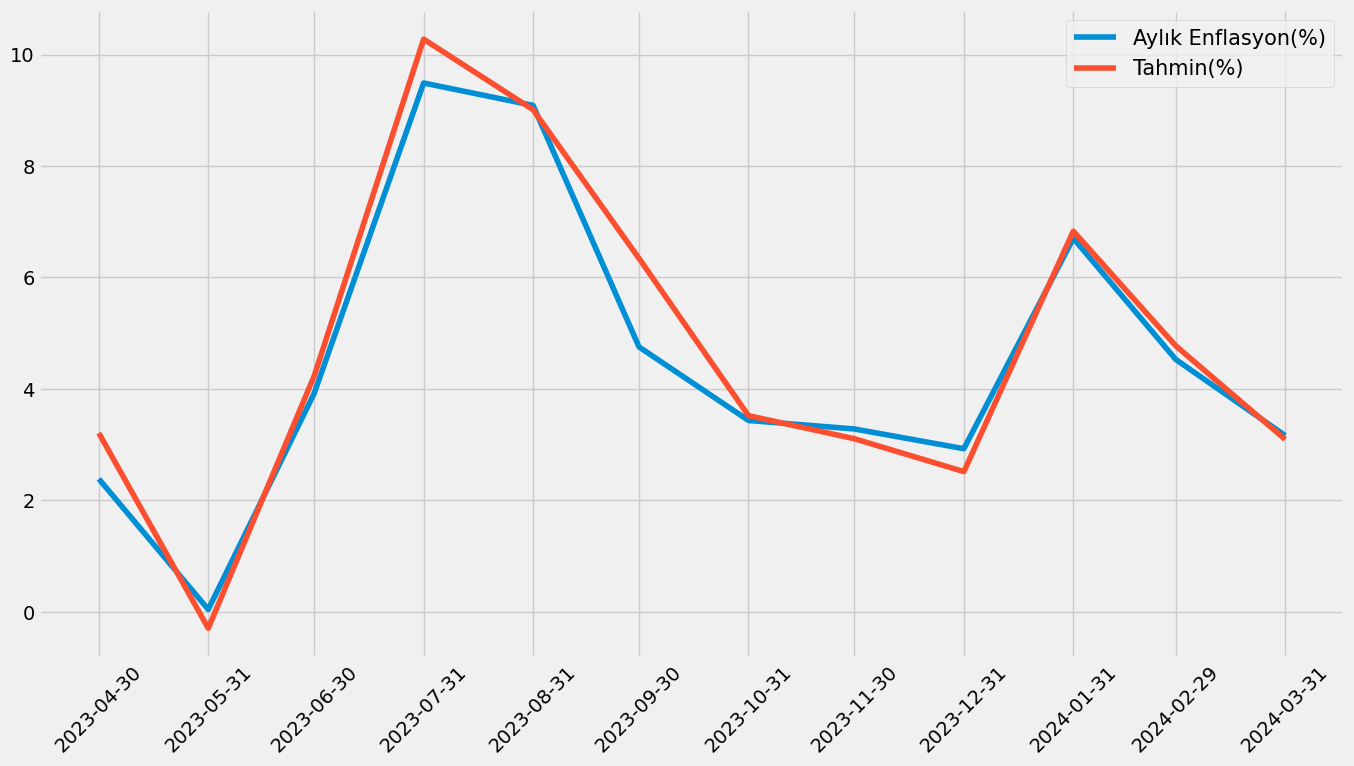

In [173]:
plt.figure(figsize=(15,8))
plt.plot(tahminler["TÜFE"],label="Aylık Enflasyon(%)")
plt.plot(tahminler["Tahmin"],label="Tahmin(%)")
plt.xticks(tahminler.index,rotation=45)
plt.legend(fontsize=15)
plt.show()

In [786]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-06-30",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


,TÜFE
2024-06-30,1.945702
2024-07-31,0.855400
2024-08-31,2.363528
2024-09-30,1.133119
2024-10-31,1.805192
2024-11-30,1.222140
2024-12-31,1.618528
2025-01-31,2.204279
2025-02-28,1.182152
2025-03-31,1.278108


In [787]:
tüfetahmin00 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin00.append(result)

tüfetahmin00 = np.array(tüfetahmin00).reshape(-1, 1)
tüfetahmin00 = pd.DataFrame(tüfetahmin00)
tüfetahmin00.columns = ["NN"]
tüfetahmin00 = tüfetahmin00.set_index(pd.date_range(start="2024-06-30", periods=len(tüfetahmin00), freq="1M"))
tüfetahmin00

,NN
2024-06-30,2326.247992
2024-07-31,2346.146711
2024-08-31,2401.598557
2024-09-30,2428.811526
2024-10-31,2472.656232
2024-11-30,2502.875557
2024-12-31,2543.385296
2025-01-31,2599.448603
2025-02-28,2630.178034
2025-03-31,2663.794563


In [834]:
data1=pd.concat([data,tahmindf],axis=0)
features=['USD/TL','Motorin','M3','Enflasyon Belirsizliği', 'Kredi','İşsizlik','TÜFE Lag','TÜFE']
data1=data1[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["TÜFE"]=scaler.fit_transform(np.array(data1["TÜFE"]).reshape(-1, 1))
scaled_data=scaled_data.iloc[1:,:]
X=scaled_data
X=X.iloc[:-16,:-1]
y=scaled_data["TÜFE"][:-16]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X_train,X_test=X[:-12,:],X[-12:,:]
y_train,y_test=y[:-12],y[-12:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.05,random_state=42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
from keras.regularizers import l2
keras.utils.set_random_seed(42)
model = Sequential()
model.add(Dense(units=1,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.5704018348571585)))
model.add(Dense(units=38,activation="selu",input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.5507354626876133)))
model.add(Dense(1))
optimizer = keras.optimizers.RMSprop(learning_rate=0.023834321386068204)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=57,verbose=1,validation_data=(X_val,y_val),callbacks=[early_stopping])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 290ms/step - loss: 3.0520 - mean_squared_error: 0.7706 - val_loss: 1.7425 - val_mean_squared_error: 0.2916
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.8896 - mean_squared_error: 0.5108 - val_loss: 1.3828 - val_mean_squared_error: 0.2444
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.7083 - mean_squared_error: 0.6388 - val_loss: 1.0540 - val_mean_squared_error: 0.1735
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.2994 - mean_squared_error: 0.4630 - val_loss: 0.8737 - val_mean_squared_error: 0.1453
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 1.1034 - mean_squared_error: 0.4115 - val_loss: 0.7332 - val_mean_squared_error: 0.1161
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.9628 - mean_squared_error: 0.3774 - val_loss: 0.6339 - val_mean_squared_error: 0.1011
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.8577 - mean_squared_error: 0.3533 - val_loss: 0.5592 - v

In [835]:
pred6=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [836]:
mean_squared_error(scaler.inverse_transform(y_test),scaler.inverse_transform(model.predict(X_test)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


0.7375255952392156

In [837]:
tahminler=pd.DataFrame(index=pd.date_range(start="2023-04-28",periods=12,freq="1M"))
tahminler["TÜFE"]=scaler.inverse_transform(y_test)
tahminler["Tahmin"]=scaler.inverse_transform(model.predict(X_test))
tahminler.iloc[1,:]-=2.88
tahminler

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


,TÜFE,Tahmin
2023-04-30,2.385509,2.723064
2023-05-31,0.043076,-0.468122
2023-06-30,3.920498,5.314532
2023-07-31,9.488824,9.893960
2023-08-31,9.086793,8.439206
2023-09-30,4.753114,6.509027
2023-10-31,3.433981,3.472986
2023-11-30,3.281097,3.042129
2023-12-31,2.927207,2.613004
2024-01-31,6.703310,5.058607


In [838]:
pred=scaler.inverse_transform(model.predict(np.array(scaled_data.iloc[-14:,:-1])))
pred=pd.DataFrame(pred)
pred.columns=["TÜFE"]
pred=pred.set_index(pd.date_range(start="2024-06-30",periods=14,freq="1M"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


,TÜFE
2024-06-30,3.208128
2024-07-31,3.333210
2024-08-31,3.276725
2024-09-30,2.682157
2024-10-31,3.206638
2024-11-30,2.159540
2024-12-31,2.817752
2025-01-31,3.370407
2025-02-28,2.464024
2025-03-31,2.163390


In [792]:
tüfetahmin000 = []
result = enf["TÜFE"].iloc[-1]
pred=np.array(pred).reshape(1,-1).ravel()
for i in range(len(pred)):
    result *= (1 + (pred[i] / 100))
    tüfetahmin000.append(result)

tüfetahmin000 = np.array(tüfetahmin000).reshape(-1, 1)
tüfetahmin000 = pd.DataFrame(tüfetahmin000)
tüfetahmin000.columns = ["NN"]
tüfetahmin000 = tüfetahmin000.set_index(pd.date_range(start="2024-06-30", periods=len(tüfetahmin000), freq="1M"))
tüfetahmin000

,NN
2024-06-30,2355.054679
2024-07-31,2433.553608
2024-08-31,2513.294475
2024-09-30,2580.704979
2024-10-31,2663.458849
2024-11-30,2720.977306
2024-12-31,2797.647708
2025-01-31,2891.939819
2025-02-28,2963.197912
2025-03-31,3027.303451


In [793]:
oran=pd.Series([0.6,0.275,0.395,0.265,0.13,0.16])
oran=1/oran
oran.values

array([1.66666667, 3.63636364, 2.53164557, 3.77358491, 7.69230769,
       6.25      ])

In [794]:
tüfetahmin=pd.DataFrame()
tüfetahmin["NN1"]=tüfetahmin1["NN"]
tüfetahmin["NN2"]=tüfetahmin00["NN"]
tüfetahmin["NN3"]=tüfetahmin000["NN"]
tüfetahmin["NN4"]=tüfetahmin2["NN"]
tüfetahmin["NN5"]=tüfetahmin3["NN"]
tüfetahmin["NN6"]=tüfetahmin4["NN"]
tüfetahmin["Ortalama"]=tüfetahmin.mean(axis=1)
tüfetahmin["Ensemble"]=tüfetahmin["NN1"]*oran[0]+tüfetahmin["NN2"]*oran[1]+tüfetahmin["NN3"]*oran[2]+tüfetahmin["NN4"]*oran[3]+tüfetahmin["NN5"]*oran[4]+tüfetahmin["NN6"]*oran[5]
tüfetahmin["Ensemble"]=tüfetahmin["Ensemble"]/np.sum(oran)
tüfetahmin

,NN1,NN2,NN3,NN4,NN5,NN6,Ortalama,Ensemble
2024-06-30,2350.461023,2326.247992,2355.054679,2328.487089,2338.427656,2350.156532,2341.472495,2340.527553
2024-07-31,2432.640181,2346.146711,2433.553608,2352.868516,2392.939534,2424.757275,2397.150971,2394.758748
2024-08-31,2515.700232,2401.598557,2513.294475,2410.870475,2451.037447,2499.971483,2465.412111,2460.425516
2024-09-30,2587.940328,2428.811526,2580.704979,2442.450466,2489.458598,2551.342197,2513.451349,2504.487157
2024-10-31,2674.254858,2472.656232,2663.458849,2490.917368,2539.550087,2615.824936,2576.110388,2562.569095
2024-11-30,2741.901659,2502.875557,2720.977306,2525.750129,2580.824702,2671.494655,2623.970668,2608.169906
2024-12-31,2821.985343,2543.385296,2797.647708,2571.906102,2632.858301,2737.998369,2684.296853,2665.505749
2025-01-31,2921.574674,2599.448603,2891.939819,2631.751337,2692.263852,2815.369366,2758.724608,2734.973032
2025-02-28,3002.068281,2630.178034,2963.197912,2667.811307,2737.129049,2876.212297,2812.766147,2785.373484
2025-03-31,3079.813301,2663.794563,3027.303451,2706.955668,2784.518872,2943.794286,2867.696690,2838.160904


In [795]:
dates=pd.date_range('2006-02-28','2024-03-28' , freq='1M')
df=pd.DataFrame()

df["CPI"]=enf["TÜFE"]
df=df.set_index(pd.to_datetime(enf.index))




dfas1=pd.DataFrame()
dfas1=pd.concat([df["CPI"],tüfetahmin.iloc[:,0]],axis=0)
dfas1=pd.DataFrame(dfas1)
dfas1.columns=[tüfetahmin.columns[0]]

dfas2=pd.DataFrame()
dfas2=pd.concat([df["CPI"],tüfetahmin.iloc[:,1]],axis=0)
dfas2=pd.DataFrame(dfas2)
dfas2.columns=[tüfetahmin.columns[1]]



dfas4=pd.DataFrame()
dfas4=pd.concat([df["CPI"],tüfetahmin.iloc[:,2]],axis=0)
dfas4=pd.DataFrame(dfas4)
dfas4.columns=[tüfetahmin.columns[2]]

dfas5=pd.DataFrame()
dfas5=pd.concat([df["CPI"],tüfetahmin.iloc[:,3]],axis=0)
dfas5=pd.DataFrame(dfas5)
dfas5.columns=[tüfetahmin.columns[3]]

dfas6=pd.DataFrame()
dfas6=pd.concat([df["CPI"],tüfetahmin.iloc[:,4]],axis=0)
dfas6=pd.DataFrame(dfas6)
dfas6.columns=[tüfetahmin.columns[4]]

dfas7=pd.DataFrame()
dfas7=pd.concat([df["CPI"],tüfetahmin.iloc[:,5]],axis=0)
dfas7=pd.DataFrame(dfas7)
dfas7.columns=[tüfetahmin.columns[5]]



dfas=pd.DataFrame()
dfas=pd.concat([dfas1,dfas2,dfas4,dfas5,dfas6],axis=1)
dfas=dfas.pct_change(periods=12)*100
dfas=dfas.dropna(axis=0)
dfas

df["Enflasyon"]=df["CPI"].pct_change(periods=12)*100
df=df.dropna(axis=0)








In [796]:
row=pd.DataFrame(((tüfetahmin.iloc[0,:]/enf["TÜFE"].iloc[-1])-1)*100)
row=row.T
row


,NN1,NN2,NN3,NN4,NN5,NN6,Ortalama,Ensemble
2024-06-30,3.006816,1.945702,3.208128,2.043828,2.479464,2.993472,2.612902,2.57149


In [839]:
aylıktahmin=tüfetahmin.pct_change(periods=1)*100
aylıktahmin=aylıktahmin.dropna(axis=0)
aylıktahmin=pd.concat([row,aylıktahmin],axis=0)
aylıktahmin

,NN1,NN2,NN3,NN4,NN5,NN6,Ortalama,Ensemble
2024-06-30,3.006816,1.945702,3.208128,2.043828,2.479464,2.993472,2.612902,2.571490
2024-07-31,3.496300,0.855400,3.333210,1.047093,2.331134,3.174288,2.377926,2.317050
2024-08-31,3.414399,2.363528,3.276725,2.465159,2.427889,3.101927,2.847595,2.742104
2024-09-30,2.871570,1.133119,2.682157,1.309900,1.567546,2.054852,1.948528,1.790814
2024-10-31,3.335260,1.805192,3.206638,1.984356,2.012144,2.527405,2.492948,2.319115
2024-11-30,2.529557,1.222140,2.159540,1.398391,1.625273,2.128190,1.857851,1.779496
2024-12-31,2.920735,1.618528,2.817752,1.827416,2.016162,2.489382,2.299042,2.198317
2025-01-31,3.529052,2.204279,3.370407,2.326883,2.256314,2.825823,2.772710,2.606158
2025-02-28,2.755145,1.182152,2.464024,1.370189,1.666449,2.161099,1.958932,1.842813
2025-03-31,2.589715,1.278108,2.163390,1.467284,1.731370,2.349687,1.952901,1.895165


In [840]:
std=aylıktahmin.iloc[:,:-1].std(axis=1)
std

2024-06-30    0.490086
2024-07-31    1.071509
2024-08-31    0.433330
2024-09-30    0.660639
2024-10-31    0.603021
2024-11-30    0.462530
2024-12-31    0.492577
2025-01-31    0.535176
2025-02-28    0.571851
2025-03-31    0.473429
2025-04-30    0.366994
2025-05-31    0.403472
2025-06-30    0.553792
2025-07-31    0.496674
dtype: float64

In [841]:
aylıktahmin["Maksimum"]=aylıktahmin["Ensemble"]+std
aylıktahmin["Minimum"]=aylıktahmin["Ensemble"]-std
aylıktahmin

,NN1,NN2,NN3,NN4,NN5,NN6,Ortalama,Ensemble,Maksimum,Minimum
2024-06-30,3.006816,1.945702,3.208128,2.043828,2.479464,2.993472,2.612902,2.571490,3.061576,2.081405
2024-07-31,3.496300,0.855400,3.333210,1.047093,2.331134,3.174288,2.377926,2.317050,3.388559,1.245542
2024-08-31,3.414399,2.363528,3.276725,2.465159,2.427889,3.101927,2.847595,2.742104,3.175434,2.308773
2024-09-30,2.871570,1.133119,2.682157,1.309900,1.567546,2.054852,1.948528,1.790814,2.451453,1.130174
2024-10-31,3.335260,1.805192,3.206638,1.984356,2.012144,2.527405,2.492948,2.319115,2.922136,1.716094
2024-11-30,2.529557,1.222140,2.159540,1.398391,1.625273,2.128190,1.857851,1.779496,2.242026,1.316966
2024-12-31,2.920735,1.618528,2.817752,1.827416,2.016162,2.489382,2.299042,2.198317,2.690894,1.705740
2025-01-31,3.529052,2.204279,3.370407,2.326883,2.256314,2.825823,2.772710,2.606158,3.141333,2.070982
2025-02-28,2.755145,1.182152,2.464024,1.370189,1.666449,2.161099,1.958932,1.842813,2.414665,1.270962
2025-03-31,2.589715,1.278108,2.163390,1.467284,1.731370,2.349687,1.952901,1.895165,2.368593,1.421736


In [842]:
aylıktahmin[[ 'NN2','NN3','NN4','NN5','NN6', 'Ortalama','Ensemble']].to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/modelaylık.csv')

In [843]:
tüfe=df["CPI"].iloc[-1]

In [844]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin10 = []
orttahmin=aylıktahmin["Ortalama"]
orttahmin=1+(orttahmin/100)
for elem in orttahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin10.append(tüfe)
tüfetahmin10=pd.DataFrame(tüfetahmin10)
tüfetahmin10=tüfetahmin10.set_index(pd.date_range(start="2024-06-30",periods=len(tüfetahmin10),freq="1M"))
tüfetahmin10.columns=["CPI"]

tüfetahmin11=pd.concat([df["CPI"],tüfetahmin10["CPI"]],axis=0)
tüfetahmin11=pd.DataFrame((tüfetahmin11.pct_change(periods=12)*100).tail(38))

    

In [845]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin14 = []
lassotahmin=aylıktahmin["NN2"]
lassotahmin=1+(lassotahmin/100)
for elem in lassotahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin14.append(tüfe)
tüfetahmin14=pd.DataFrame(tüfetahmin14)
tüfetahmin14=tüfetahmin14.set_index(pd.date_range(start="2024-06-30",periods=len(tüfetahmin14),freq="1M"))
tüfetahmin14.columns=["CPI"]
tüfetahmin14=pd.concat([df["CPI"],tüfetahmin14["CPI"]],axis=0)
tüfetahmin14=pd.DataFrame((tüfetahmin14.pct_change(periods=12)*100).tail(38))


In [846]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin15 = []
larstahmin=aylıktahmin["NN3"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin15.append(tüfe)
tüfetahmin15=pd.DataFrame(tüfetahmin15)
tüfetahmin15=tüfetahmin15.set_index(pd.date_range(start="2024-06-30",periods=len(tüfetahmin15),freq="1M"))
tüfetahmin15.columns=["CPI"]
tüfetahmin15=pd.concat([df["CPI"],tüfetahmin15["CPI"]],axis=0)
tüfetahmin15=pd.DataFrame((tüfetahmin15.pct_change(periods=12)*100).tail(38))


In [847]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin16 = []
larstahmin=aylıktahmin["NN4"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin16.append(tüfe)
tüfetahmin16=pd.DataFrame(tüfetahmin16)
tüfetahmin16=tüfetahmin16.set_index(pd.date_range(start="2024-06-30",periods=len(tüfetahmin16),freq="1M"))
tüfetahmin16.columns=["CPI"]
tüfetahmin16=pd.concat([df["CPI"],tüfetahmin16["CPI"]],axis=0)
tüfetahmin16=pd.DataFrame((tüfetahmin16.pct_change(periods=12)*100).tail(38))


In [848]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin17 = []
larstahmin=aylıktahmin["NN5"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin17.append(tüfe)
tüfetahmin17=pd.DataFrame(tüfetahmin17)
tüfetahmin17=tüfetahmin17.set_index(pd.date_range(start="2024-06-30",periods=len(tüfetahmin17),freq="1M"))
tüfetahmin17.columns=["CPI"]
tüfetahmin17=pd.concat([df["CPI"],tüfetahmin17["CPI"]],axis=0)
tüfetahmin17=pd.DataFrame((tüfetahmin17.pct_change(periods=12)*100).tail(38))

In [849]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin18 = []
larstahmin=aylıktahmin["NN6"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin18.append(tüfe)
tüfetahmin18=pd.DataFrame(tüfetahmin18)
tüfetahmin18=tüfetahmin18.set_index(pd.date_range(start="2024-06-30",periods=len(tüfetahmin18),freq="1M"))
tüfetahmin18.columns=["CPI"]
tüfetahmin18=pd.concat([df["CPI"],tüfetahmin18["CPI"]],axis=0)
tüfetahmin18=pd.DataFrame((tüfetahmin18.pct_change(periods=12)*100).tail(38))

In [850]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin19 = []
larstahmin=aylıktahmin["Ensemble"]
larstahmin=1+(larstahmin/100)
for elem in larstahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin19.append(tüfe)
tüfetahmin19=pd.DataFrame(tüfetahmin19)
tüfetahmin19=tüfetahmin19.set_index(pd.date_range(start="2024-06-30",periods=len(tüfetahmin19),freq="1M"))
tüfetahmin19.columns=["CPI"]
tüfetahmin19=pd.concat([df["CPI"],tüfetahmin19["CPI"]],axis=0)
tüfetahmin19=pd.DataFrame((tüfetahmin19.pct_change(periods=12)*100).tail(38))

In [851]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin23 = []
maxtahmin=aylıktahmin["Maksimum"]
maxtahmin=1+(maxtahmin/100)
for elem in maxtahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin23.append(tüfe)
tüfetahmin23=pd.DataFrame(tüfetahmin23)
tüfetahmin23=tüfetahmin23.set_index(pd.date_range(start="2024-06-30",periods=len(tüfetahmin23),freq="1M"))
tüfetahmin23.columns=["CPI"]
tüfetahmin23=pd.concat([df["CPI"],tüfetahmin23["CPI"]],axis=0)
tüfetahmin23=pd.DataFrame((tüfetahmin23.pct_change(periods=12)*100).tail(38))
tüfetahmin23


,CPI
2022-06-30,78.618397
2022-07-31,79.602053
2022-08-31,80.207594
2022-09-30,83.452494
2022-10-31,85.514786
2022-11-30,84.389260
2022-12-31,64.269597
2023-01-31,57.682481
2023-02-28,55.179828
2023-03-31,50.508511


In [852]:
tüfe=df["CPI"].iloc[-1]
tüfetahmin24 = []
mintahmin=aylıktahmin["Minimum"]
mintahmin=1+(mintahmin/100)
for elem in mintahmin:
    tüfe *= elem  # Her elemanı sonuca çarp
    tüfetahmin24.append(tüfe)
tüfetahmin24=pd.DataFrame(tüfetahmin24)
tüfetahmin24=tüfetahmin24.set_index(pd.date_range(start="2024-06-30",periods=len(tüfetahmin24),freq="1M"))
tüfetahmin24.columns=["CPI"]
tüfetahmin24=pd.concat([df["CPI"],tüfetahmin24["CPI"]],axis=0)
tüfetahmin24=pd.DataFrame((tüfetahmin24.pct_change(periods=12)*100).tail(38))
tüfetahmin24

,CPI
2022-06-30,78.618397
2022-07-31,79.602053
2022-08-31,80.207594
2022-09-30,83.452494
2022-10-31,85.514786
2022-11-30,84.389260
2022-12-31,64.269597
2023-01-31,57.682481
2023-02-28,55.179828
2023-03-31,50.508511


In [853]:
aylık=data["TÜFE"]
aylık=pd.DataFrame(aylık)

In [854]:
aylık1=aylıktahmin
aylık1=aylık1[["Ensemble"]]
aylık1.columns=["TÜFE"]
aylık1=pd.concat([aylık["TÜFE"],aylık1["TÜFE"]],axis=0)
aylık1=pd.DataFrame(aylık1)
#aylık1=aylık1.set_index(pd.date_range(start="2014-01-30",end="2025-02-27",freq="1M"))
aylık1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/aylık.csv')

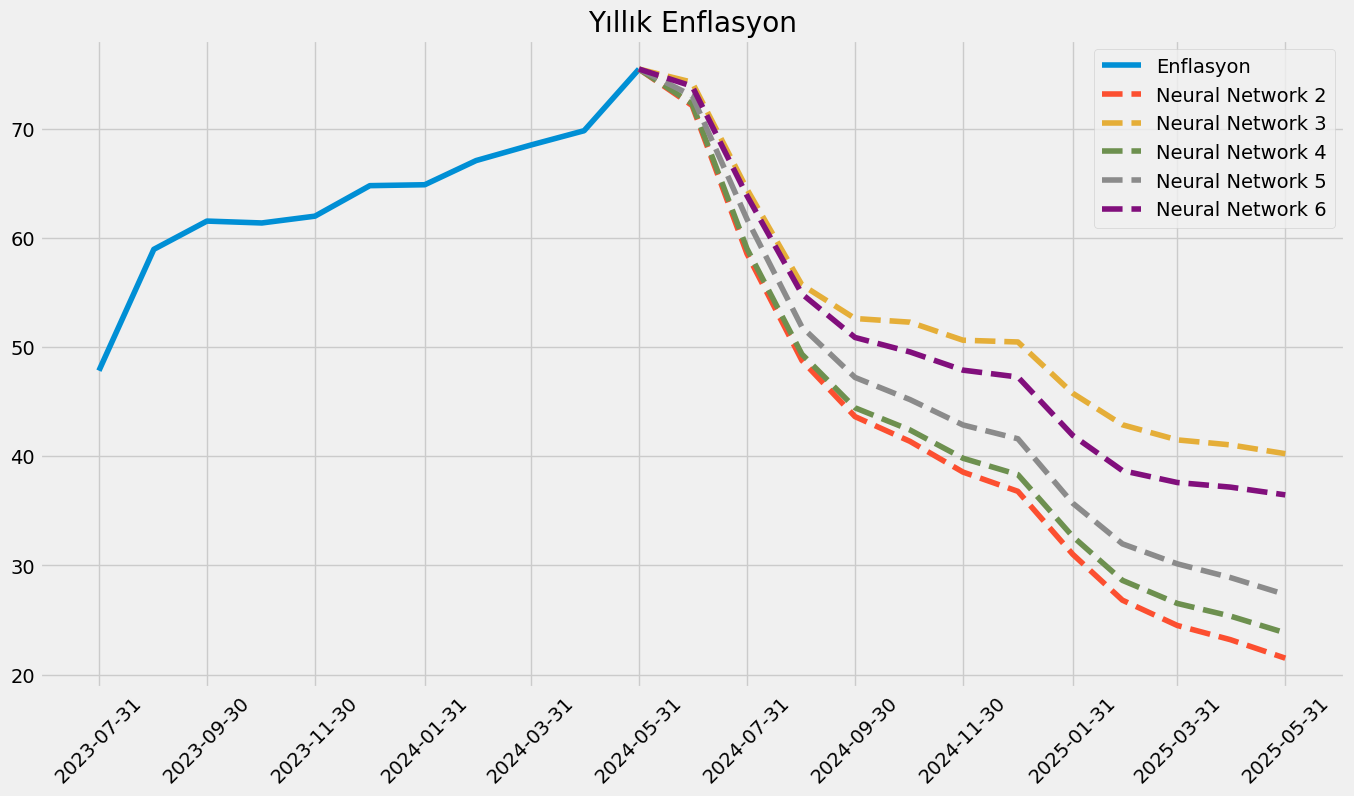

In [855]:
plt.style.use("fivethirtyeight")
yıllıktahmin=pd.DataFrame()
yıllıktahmin["Ortalama"]=tüfetahmin11["CPI"]
yıllıktahmin["NN2"]=tüfetahmin14["CPI"]
yıllıktahmin["NN3"]=tüfetahmin15["CPI"]
yıllıktahmin["NN4"]=tüfetahmin16["CPI"]
yıllıktahmin["NN5"]=tüfetahmin17["CPI"]
yıllıktahmin["NN6"]=tüfetahmin18["CPI"]
yıllıktahmin["Ensemble"]=tüfetahmin19["CPI"]
plt.figure(figsize=(15,8))
plt.plot(yıllıktahmin["Ortalama"].iloc[13:24],label="Enflasyon")
plt.plot(yıllıktahmin["NN2"].iloc[23:-2],'--',label="Neural Network 2")
plt.plot(yıllıktahmin["NN3"].iloc[23:-2],'--',label="Neural Network 3")
plt.plot(yıllıktahmin["NN4"].iloc[23:-2],'--',label="Neural Network 4")
plt.plot(yıllıktahmin["NN5"].iloc[23:-2],'--',label="Neural Network 5")
plt.plot(yıllıktahmin["NN6"].iloc[23:-2],'--',label="Neural Network 6")
plt.legend(loc=0)
plt.xticks(yıllıktahmin.index[13:-2:2],rotation=45)
#plt.xticks(pd.date_range(start="2022-12-30",end="2025-01-27",freq="1M")[::2])
plt.title("Yıllık Enflasyon")
plt.show()

In [856]:
yıllıktahmin["Maksimum"]=tüfetahmin23["CPI"]
yıllıktahmin["Minimum"]=tüfetahmin24["CPI"]
yıllıktahmin

,Ortalama,NN2,NN3,NN4,NN5,NN6,Ensemble,Maksimum,Minimum
2022-06-30,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397,78.618397
2022-07-31,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053,79.602053
2022-08-31,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594,80.207594
2022-09-30,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494,83.452494
2022-10-31,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786,85.514786
2022-11-30,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260,84.389260
2022-12-31,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597,64.269597
2023-01-31,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481,57.682481
2023-02-28,55.179828,55.179828,55.179828,55.179828,55.179828,55.179828,55.179828,55.179828,55.179828
2023-03-31,50.508511,50.508511,50.508511,50.508511,50.508511,50.508511,50.508511,50.508511,50.508511


In [857]:
yıllıktahmin1=yıllıktahmin[['Ortalama','NN2','NN3','NN4','NN5','NN6','Ensemble', 'Maksimum',
       'Minimum']]

yıllıktahmin1.columns=['Ortalama','NN2','NN3','NN4','NN5','NN6','Ensemble', 'Maksimum',
       'Minimum']
yıllıktahmin1.to_csv('C:/Users/Bora/Documents/GitHub/streamlit-inflation/yıllıktahmin.csv')

In [858]:
sonu2023=str(yıllıktahmin.iloc[20,0])[:5]
tepe=str(yıllıktahmin.iloc[-14,0])[:5]
sonu2024=str(yıllıktahmin.iloc[-7,0])[:5]
max=str(yıllıktahmin.iloc[-8,0])[:5]
min=str(yıllıktahmin.iloc[-8,0])[:5]


In [874]:
sonu12024=str(yıllıktahmin.iloc[-8,-3])[:5]

In [875]:
min1=str(yıllıktahmin.iloc[-8,-1])[:2]
max1=str(yıllıktahmin.iloc[-8,-2])[:2]

In [861]:
params = {
    'series': "TP.PKAUO.S01.D.U",
    'startDate': "01-05-2024",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ay12sonra = formatted_response['items']
ay12sonra = pd.DataFrame(ay12sonra)


ay12sonra = ay12sonra.drop(columns=['UNIXTIME','Tarih'])
ay12sonra.columns = ['Beklenti']
ay12sonra['Beklenti'] = pd.to_numeric(ay12sonra['Beklenti'])
ay12sonra=ay12sonra.set_index(pd.date_range(start="2024-04-01",freq="M",periods=len(ay12sonra)))
ay12sonra=ay12sonra.dropna()
ay12sonra

,Beklenti
2024-04-30,43.64


In [862]:
enf1=enf._append({"TÜFE":2207.50*1.0304},ignore_index=True)
enf1=enf.set_index(pd.date_range(start="2006-01-31",freq="M",periods=len(enf)))
enf1

,TÜFE
2006-01-31,123.57
2006-02-28,123.84
2006-03-31,124.18
2006-04-30,125.84
2006-05-31,128.20
...,...
2024-01-31,1984.02
2024-02-29,2073.88
2024-03-31,2139.47
2024-04-30,2207.50


In [863]:
params = {
    'series': "TP.BEK.S01.A.A",
    'startDate': "30-09-2023",
    'endDate': "31-05-2024",
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

caritüfe = formatted_response['items']
caritüfe = pd.DataFrame(caritüfe)


caritüfe = caritüfe.drop(columns=['UNIXTIME','Tarih'])
caritüfe.columns = ['Beklenti']
caritüfe['Beklenti'] = pd.to_numeric(caritüfe['Beklenti'])
caritüfe["Beklenti"]=1+(caritüfe["Beklenti"]/100)
caritüfe=caritüfe.set_index(pd.date_range(start="2023-09-30",freq="M",periods=len(caritüfe)))
caritüfe["TÜFEt-1"]=enf["TÜFE"].shift(1).loc["2023-08-30":]
caritüfe["TÜFEt-12"]=enf["TÜFE"].loc["2022-09-30":"2023-05-31"].values
caritüfe["Tüfe Tahmin"]=caritüfe["Beklenti"]*caritüfe["TÜFEt-1"]
caritüfe["Enflasyon Tahmin"]=100*((caritüfe["Tüfe Tahmin"]/caritüfe["TÜFEt-12"])-1)
caritüfe

,Beklenti,TÜFEt-1,TÜFEt-12,Tüfe Tahmin,Enflasyon Tahmin
2023-09-30,1.0514,1614.31,1046.89,1697.285534,62.126444
2023-10-31,1.0430,1691.04,1084.00,1763.754720,62.708000
2023-11-30,1.0407,1749.11,1115.26,1820.298777,63.217436
2023-12-31,1.0329,1806.50,1128.45,1865.933850,65.353702
2024-01-31,1.0541,1859.38,1203.48,1959.972458,62.858748
2024-02-29,1.0389,1984.02,1241.33,2061.198378,66.047576
2024-03-31,1.0342,2073.88,1269.75,2144.806696,68.915668
2024-04-30,1.0330,2139.47,1300.04,2210.072510,70.000347
2024-05-31,1.0300,2207.50,1300.60,2273.725000,74.821236


In [864]:
geçmiş=pd.DataFrame({"Tahmin":[61.94,60.84,62.13,64.71,65.06,65.73,69.47,69.69,74.65]})
geçmiş=geçmiş.set_index(pd.date_range(start="2023-09-30",end="2024-05-31",freq="M"))
geçmiş

,Tahmin
2023-09-30,61.94
2023-10-31,60.84
2023-11-30,62.13
2023-12-31,64.71
2024-01-31,65.06
2024-02-29,65.73
2024-03-31,69.47
2024-04-30,69.69
2024-05-31,74.65


In [865]:
tüfe=enf1["TÜFE"].iloc[-1]
piyasa=[tüfe,1.0304,1.0256,1.0234]
piyasa=np.cumprod(piyasa)
piyasa=piyasa[1:]
piyasa

array([2351.21824   , 2411.40942694, 2467.83640753])

In [866]:
piyasa=pd.DataFrame({"TÜFE":[2274.608,2332.8379,2387.4263,np.nan,np.nan,np.nan,np.nan,2670.81]})
piyasa.columns=["TÜFE"]
piyasa=piyasa.set_index(pd.date_range(start="2024-05-31",end="2024-12-31",freq="M"))
piyasa

,TÜFE
2024-05-31,2274.6080
2024-06-30,2332.8379
2024-07-31,2387.4263
2024-08-31,NaN
2024-09-30,NaN
2024-10-31,NaN
2024-11-30,NaN
2024-12-31,2670.8100


In [879]:
enf[-7:]

,TÜFE
2023-11-30,1806.50
2023-12-31,1859.38
2024-01-31,1984.02
2024-02-29,2073.88
2024-03-31,2139.47
2024-04-30,2207.50
2024-05-31,2281.85


In [898]:
piyasa=pd.DataFrame({"TÜFE":[2274.608,2332.8379,2387.4263,np.nan,np.nan,np.nan,np.nan,2670.81,np.nan,np.nan,np.nan,np.nan,3039.65,np.nan]})
piyasa.columns=["TÜFE"]
piyasa=piyasa.set_index(pd.date_range(start="2024-05-31",end="2025-06-30",freq="M"))
piyasaenf=pd.concat([enf1["TÜFE"].iloc[:-1],piyasa["TÜFE"]],axis=0)
piyasaenf=pd.DataFrame(piyasaenf)
piyasaenf

,TÜFE
2006-01-31,123.57
2006-02-28,123.84
2006-03-31,124.18
2006-04-30,125.84
2006-05-31,128.20
...,...
2025-02-28,NaN
2025-03-31,NaN
2025-04-30,NaN
2025-05-31,3039.65


In [899]:
piyasaenf.interpolate(method="linear", inplace=True)
piyasaenf.pct_change(12)*100

,TÜFE
2006-01-31,NaN
2006-02-28,NaN
2006-03-31,NaN
2006-04-30,NaN
2006-05-31,NaN
...,...
2025-02-28,35.897255
2025-03-31,35.178993
2025-04-30,34.354790
2025-05-31,33.634015


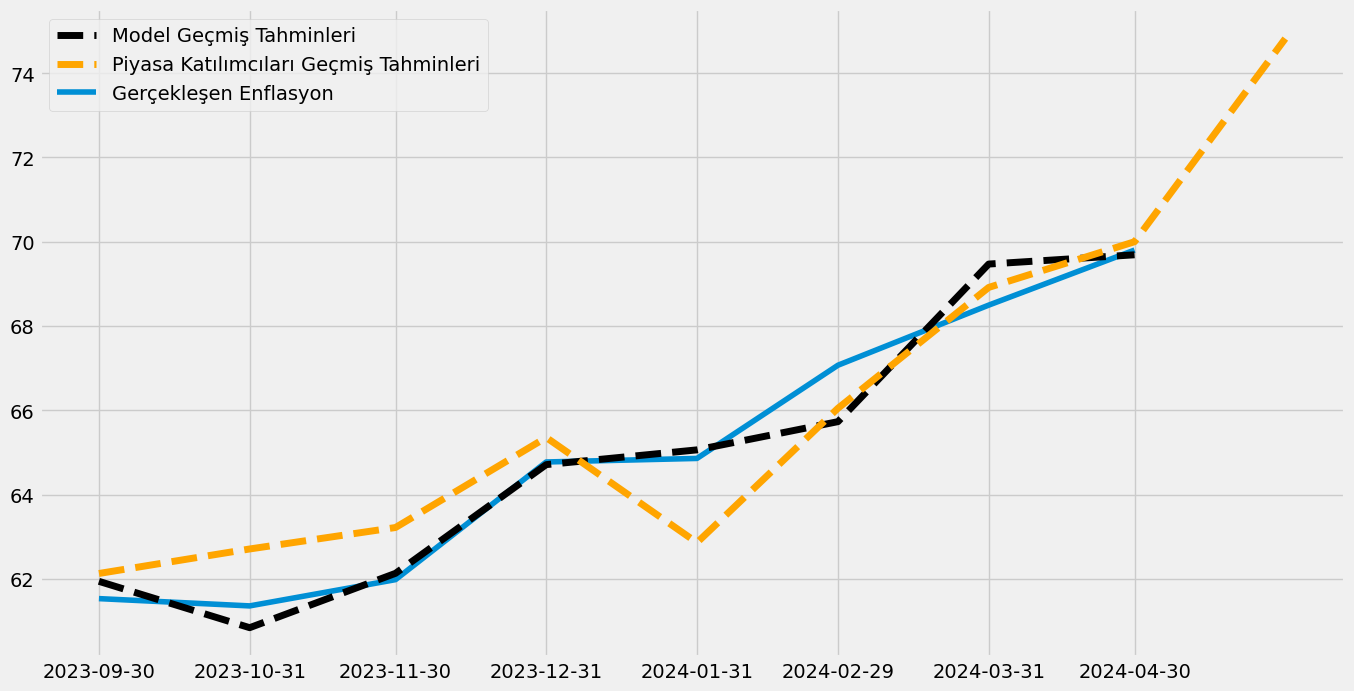

In [883]:
plt.figure(figsize=(15,8))
plt.plot(geçmiş["Tahmin"],'--',label="Model Geçmiş Tahminleri",color="black",linewidth=5,zorder=3)
plt.plot(caritüfe["Enflasyon Tahmin"],'--',label="Piyasa Katılımcıları Geçmiş Tahminleri",color="orange",linewidth=5,zorder=3)
plt.plot((enf.pct_change(12)*100).loc["2023-09-30":"2024-05-30"],label="Gerçekleşen Enflasyon")
plt.xticks(geçmiş.index)
plt.legend()

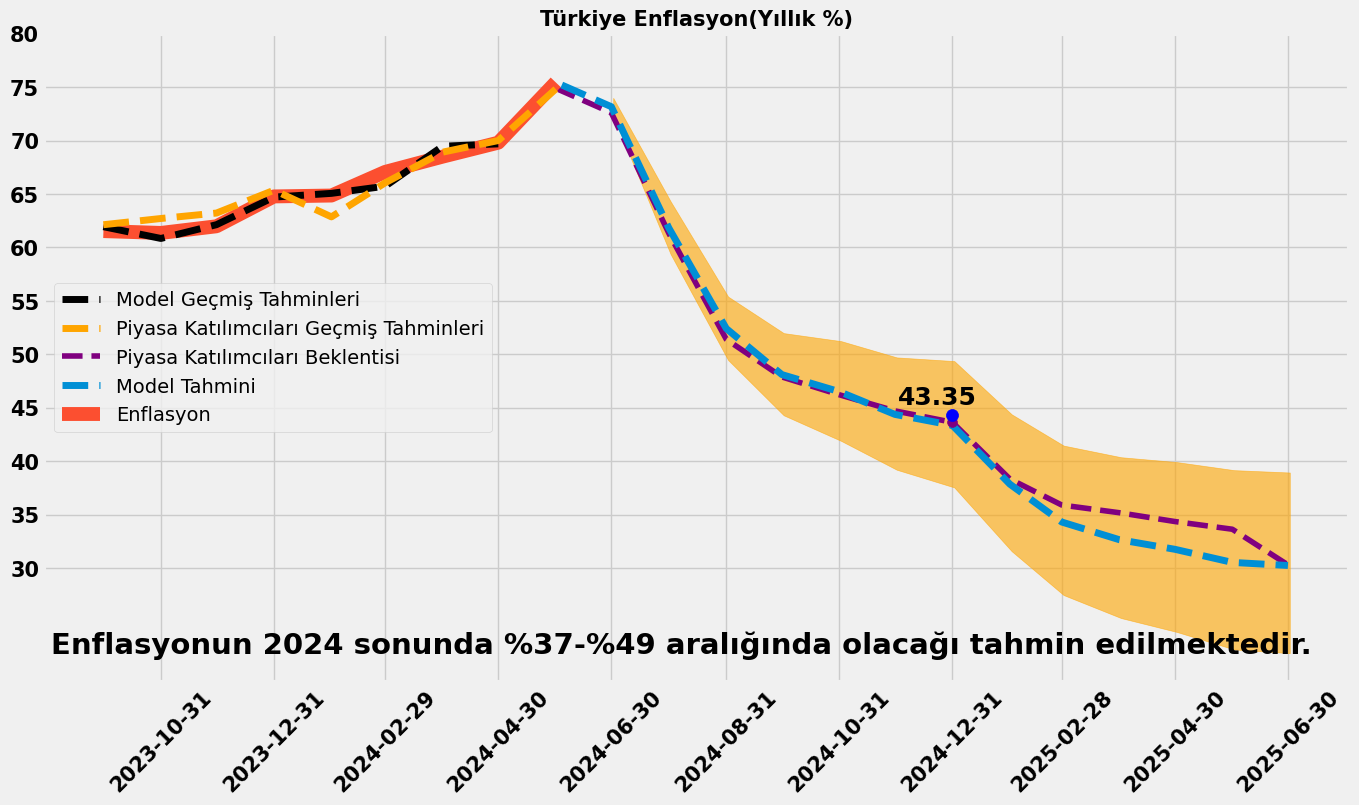

In [900]:
import matplotlib.dates as mdates  # datetime işlevlerini içe aktarın

# ...

plt.style.use('fivethirtyeight')
fig=plt.figure(figsize=(15,8))
plt.scatter(x=pd.to_datetime("2024-12-31"),y=ay12sonra["Beklenti"].values,color="purple",zorder=3,s=50)
geçmiş=pd.DataFrame({"Tahmin":[61.94,60.84,62.13,64.71,65.06,65.73,69.47,69.69]})
geçmiş=geçmiş.set_index(pd.date_range(start="2023-09-30",end="2024-04-30",freq="M"))
plt.plot(geçmiş["Tahmin"],'--',label="Model Geçmiş Tahminleri",color="black",linewidth=5,zorder=3)
plt.plot(caritüfe["Enflasyon Tahmin"],'--',label="Piyasa Katılımcıları Geçmiş Tahminleri",color="orange",linewidth=5,zorder=3)
plt.plot((piyasaenf.pct_change(12)*100).tail(14),"--",color="purple",label="Piyasa Katılımcıları Beklentisi")
plt.scatter(x=yıllıktahmin.index[30],y=yıllıktahmin.iloc[30,0],color='blue',zorder=4,s=75)
plt.plot(yıllıktahmin["Ensemble"].iloc[21:-1],'--',label="Model Tahmini",linewidth=5)
plt.plot(yıllıktahmin["Ensemble"].iloc[15:24],label="Enflasyon",linewidth=10)
plt.fill_between(yıllıktahmin.iloc[24:].index.strftime("%Y-%m"), yıllıktahmin["Maksimum"].iloc[24:].shift(1), yıllıktahmin["Minimum"].iloc[24:].shift(1), alpha=0.6, color='orange')
annotation_date = mdates.datestr2num('2025-07')
plt.text(mdates.datestr2num('2025-01'), float(sonu12024)+2, sonu12024, fontsize=18, color='black', horizontalalignment='right',fontweight='bold')
plt.text(annotation_date, 22, f"Enflasyonun 2024 sonunda %{min1}-%{max1} aralığında olacağı tahmin edilmektedir.", fontsize=21, color='black', horizontalalignment='right',fontweight='bold')
plt.xticks(yıllıktahmin.index[16::2],rotation=45,fontsize=15,fontweight="bold")
plt.yticks(np.arange(30,85,5),fontsize=15,fontweight="bold")
plt.title("Türkiye Enflasyon(Yıllık %)",fontsize=15,fontweight="bold")
plt.legend(loc=6)
plt.savefig('forecast.png')
plt.savefig("./forecasts/"+date.today().strftime("%d-%m-%Y")+'.png')
plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2023-09'),
  Text(1, 0, '2023-10'),
  Text(2, 0, '2023-11'),
  Text(3, 0, '2023-12'),
  Text(4, 0, '2024-01'),
  Text(5, 0, '2024-02'),
  Text(6, 0, '2024-03'),
  Text(7, 0, '2024-04'),
  Text(8, 0, '2024-05')])

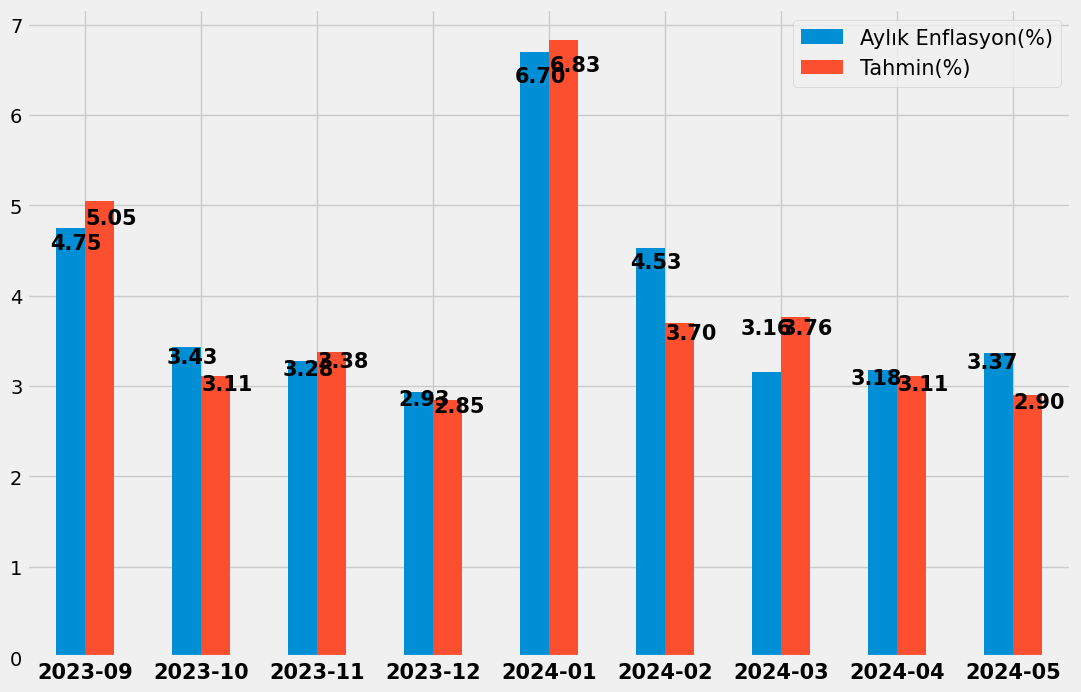

In [871]:
import matplotlib.axes as ax
gecmis=pd.DataFrame({"Aylık Enflasyon(%)":[4.75,3.43,3.28,2.93,6.70,4.53,3.16,3.18,3.37],"Tahmin(%)":[5.05,3.11,3.38,2.85,6.83,3.70,3.76,3.11,2.90]})
gecmis=gecmis.set_index(pd.date_range(start="2023-09-30",periods=9,freq="M"))
gecmis=gecmis.set_index(gecmis.index.strftime("%Y-%m"))
gecmis.plot(kind="bar",figsize=(12,8))
plt.annotate("4.75",xy=(-0.3,gecmis.iloc[0,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("5.05",xy=(0,gecmis.iloc[0,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.43",xy=(0.7,gecmis.iloc[1,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(1,gecmis.iloc[1,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.28",xy=(1.7,gecmis.iloc[2,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.38",xy=(2,gecmis.iloc[2,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.93",xy=(2.7,gecmis.iloc[3,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.85",xy=(3,gecmis.iloc[3,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.70",xy=(3.7,gecmis.iloc[4,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("6.83",xy=(4,gecmis.iloc[4,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("4.53",xy=(4.7,gecmis.iloc[5,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.70",xy=(5,gecmis.iloc[5,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.16",xy=(5.65,gecmis.iloc[6,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.76",xy=(6,gecmis.iloc[6,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.18",xy=(6.6,gecmis.iloc[7,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.11",xy=(7,gecmis.iloc[7,1]*0.95),fontweight="bold",fontsize=15)
plt.annotate("3.37",xy=(7.6,gecmis.iloc[8,0]*0.95),fontweight="bold",fontsize=15)
plt.annotate("2.90",xy=(8,gecmis.iloc[8,1]*0.95),fontweight="bold",fontsize=15)


plt.legend(fontsize=15)
plt.xticks(rotation=0,fontweight="bold",fontsize=15,color="black")

In [872]:
usd

,USD/TL
2006-01-31,1.334344
2006-02-28,1.326535
2006-03-31,1.335139
2006-04-30,1.337345
2006-05-31,1.420659
...,...
2024-02-29,30.759448
2024-03-31,31.986743
2024-04-30,32.329467
2024-05-31,32.247882


Text(12.75, 2.1718003605813463, '2.28')

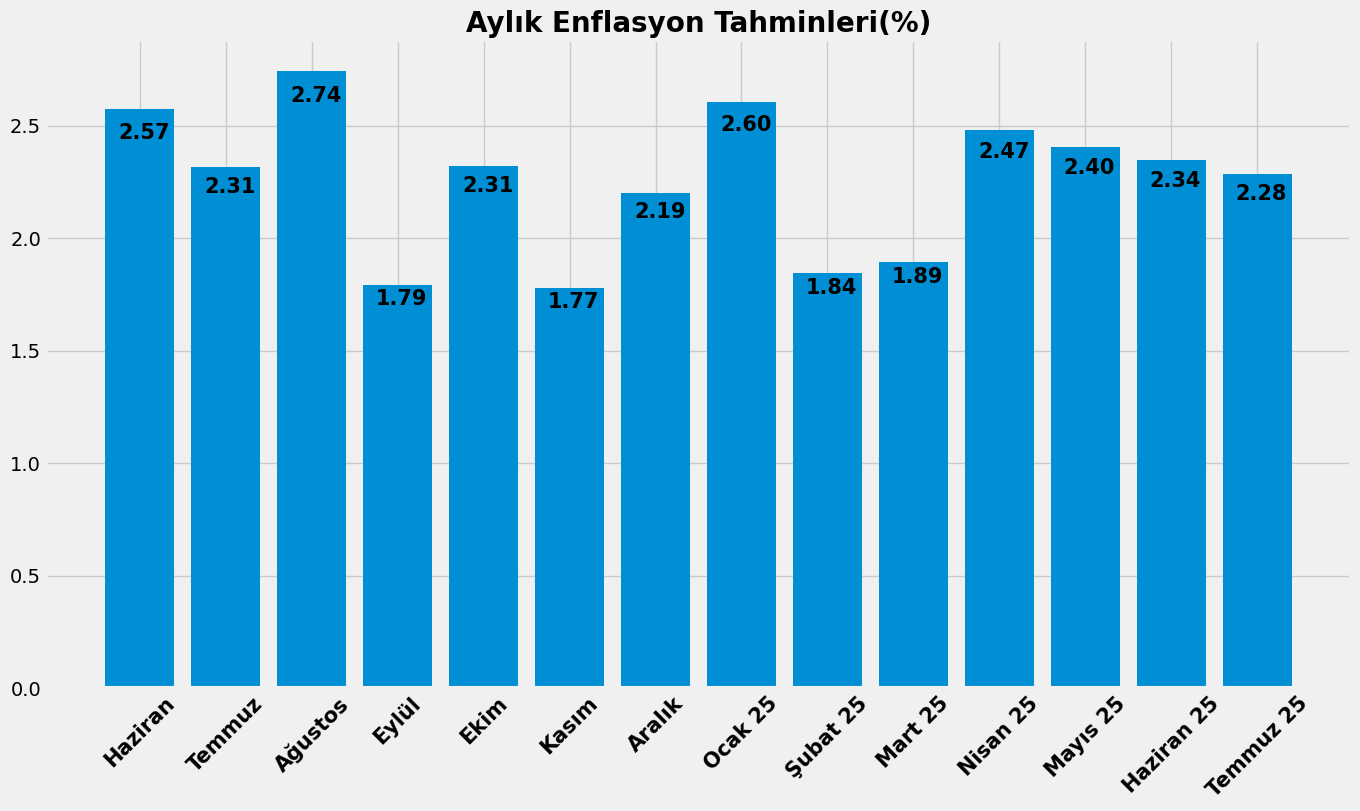

In [873]:
plt.figure(figsize=(15,8))
plt.bar(x=["Haziran","Temmuz","Ağustos","Eylül","Ekim","Kasım","Aralık","Ocak 25","Şubat 25","Mart 25","Nisan 25","Mayıs 25","Haziran 25","Temmuz 25"],height=aylıktahmin.iloc[:,-3])
plt.xticks(rotation=45,fontweight="bold",color="black",fontsize=15)
plt.title("Aylık Enflasyon Tahminleri(%)",fontweight="bold",fontsize=20)
plt.annotate(str(aylıktahmin.iloc[0,-3])[:4],xy=(-0.25,aylıktahmin.iloc[0,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[1,-3])[:4],xy=(0.75,aylıktahmin.iloc[1,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[2,-3])[:4],xy=(1.75,aylıktahmin.iloc[2,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[3,-3])[:4],xy=(2.75,aylıktahmin.iloc[3,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[4,-3])[:4],xy=(3.75,aylıktahmin.iloc[4,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[5,-3])[:4],xy=(4.75,aylıktahmin.iloc[5,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[6,-3])[:4],xy=(5.75,aylıktahmin.iloc[6,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[7,-3])[:4],xy=(6.75,aylıktahmin.iloc[7,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[8,-3])[:4],xy=(7.75,aylıktahmin.iloc[8,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[9,-3])[:4],xy=(8.75,aylıktahmin.iloc[9,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[10,-3])[:4],xy=(9.75,aylıktahmin.iloc[10,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[11,-3])[:4],xy=(10.75,aylıktahmin.iloc[11,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[12,-3])[:4],xy=(11.75,aylıktahmin.iloc[12,-3]*0.95),fontweight="bold",fontsize=15)
plt.annotate(str(aylıktahmin.iloc[13,-3])[:4],xy=(12.75,aylıktahmin.iloc[13,-3]*0.95),fontweight="bold",fontsize=15)


